In [5]:
import pickle

In [188]:
full_train_copy['Patient'] = [x.split('/')[2] for x in full_train_copy['Path']]
full_train_copy['Study'] = [x.split('/')[3] for x in full_train_copy['Path']]

full_valid_copy['Patient'] = [x.split('/')[2] for x in full_valid_copy['Path']]
full_valid_copy['Study'] = [x.split('/')[3] for x in full_valid_copy['Path']]

In [189]:
full_train_copy.shape

(223414, 21)

In [190]:
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices']

data_df_stat = []

for i in cols:
    minusOneVal = sum(np.where(full_train_copy[i] == -1,1,0))
    oneVal = sum(np.where(full_train_copy[i] == 1,1,0))
    zeroVal = sum(np.where(full_train_copy[i] == 0,1,0))
    nanVal = full_train_copy[i].isnull().sum()
    data_df_stat.append([i,minusOneVal,oneVal,zeroVal,nanVal])
    
data_df_stat = pd.DataFrame(data_df_stat)
data_df_stat.columns = ['Label','minusOneVal','oneVal','zeroVal','nanVal']

print(data_df_stat)

                         Label  minusOneVal  oneVal  zeroVal  nanVal
0                   No Finding            0   22381        0  201033
1   Enlarged Cardiomediastinum        12403   10798    21638  178575
2                 Cardiomegaly         8087   27000    11116  177211
3                 Lung Opacity         5598  105581     6599  105636
4                  Lung Lesion         1488    9186     1270  211470
5                        Edema        12984   52246    20726  137458
6                Consolidation        27742   14783    28097  152792
7                    Pneumonia        18770    6039     2799  195806
8                  Atelectasis        33739   33376     1328  154971
9                 Pneumothorax         3145   19448    56341  144480
10            Pleural Effusion        11628   86187    35396   90203
11               Pleural Other         2653    3523      316  216922
12                    Fracture          642    9040     2512  211220
13             Support Devices    

In [191]:
# Create a mask that checks for any -1 values across the specified columns
mask = (full_train_copy[cols] != -1).all(axis=1)

# Create a new DataFrame without rows containing -1 becuase -1 implies that the annotator (radiologist) was uncertain
# hence we do not want to confuse the model and by brining noise to the supervision this way by using uncertain labels
# there is still plenty of data that can be worked with without the -1 in the the columns 
df_without_minus = full_train_copy[mask]

# Get the count of rows in df_without_minus
row_count = df_without_minus.shape[0]

print(f"The number of rows in df_without_minus: {row_count}")

The number of rows in df_without_minus: 138358


In [192]:
df_without_minus = df_without_minus.replace(np.nan, 0.0)
df_data = df_without_minus
# df_data.head()

In [193]:
print(df_data.shape)
df_data.head()

(138358, 21)


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient,Study
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00001,study1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003,study1
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00005,study1


In [182]:
df_without_minus.size

2905518

In [194]:
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices']

In [195]:
import pandas as pd

# Assuming df_data is the DataFrame and 'cols' contains the class columns
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
        'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 
        'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
        'Pleural Other', 'Fracture', 'Support Devices']

# Copy the original DataFrame to avoid modifying it directly
df_single_class = df_data.copy()

# Iterate over the rows and select the first '1' encountered in the class columns
for index, row in df_single_class.iterrows():
    # Find the class columns where the value is 1
    class_values = row[cols] == 1
    # If multiple classes are '1', keep only the first class as '1' and set others to '0'
    if class_values.sum() > 1:
        first_class = class_values.idxmax()  # Get the first class column with '1'
        df_single_class.loc[index, cols] = 0  # Set all class columns to '0'
        df_single_class.loc[index, first_class] = 1  # Set the first class to '1'

# Display the updated DataFrame
df_single_class.head()


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient,Study
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00001,study1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003,study1
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00005,study1


In [16]:
df_single_class.shape

(138358, 21)

## frequency distribution

In [196]:
df_chexpert_test = df_single_class[100000:125000]

Frequency Count for Each Class:
No Finding: 22271.0
Enlarged Cardiomediastinum: 7106.0
Cardiomegaly: 16459.0
Lung Opacity: 43556.0
Lung Lesion: 2426.0
Edema: 13221.0
Consolidation: 3688.0
Pneumonia: 721.0
Atelectasis: 7980.0
Pneumothorax: 6021.0
Pleural Effusion: 6397.0
Pleural Other: 451.0
Fracture: 1988.0
Support Devices: 1817.0

Total occurrences across all classes: 134102.0


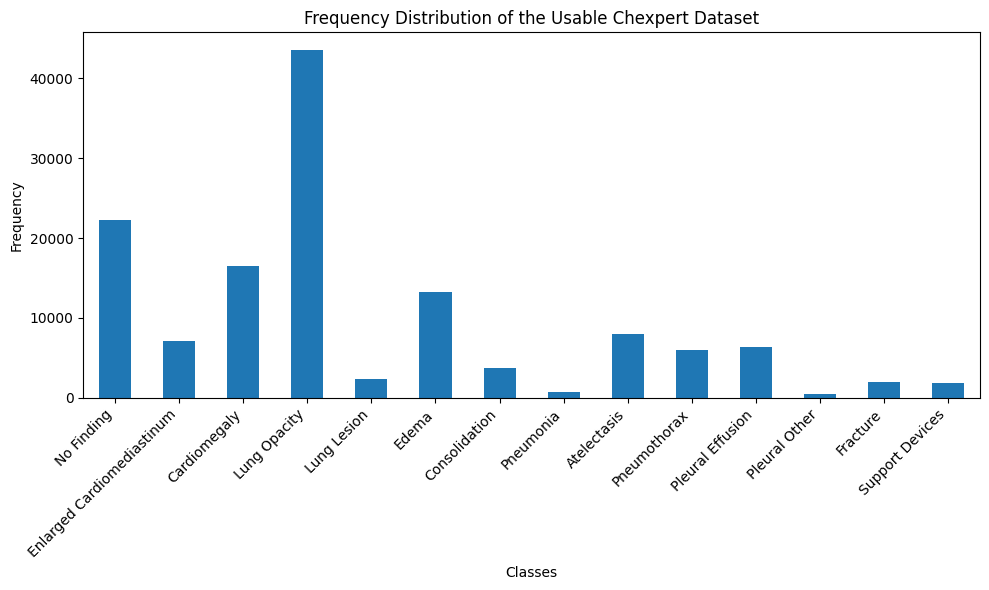

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_single_class is your DataFrame after processing
# Example of columns for classes
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
        'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 
        'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
        'Pleural Other', 'Fracture', 'Support Devices']

# Replace this with your actual dataframe
# df_single_class = your_processed_dataframe

# Count occurrences of '1' in each column (i.e., each class)
class_counts = df_single_class[cols].sum()

# Print the frequency count for each class separately
print("Frequency Count for Each Class:")
for col, count in class_counts.items():
    print(f"{col}: {count}")

# Print the total occurrences across all classes
total_count = class_counts.sum()
print(f"\nTotal occurrences across all classes: {total_count}")

# Create a bar plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')

# Add title and labels
plt.title('Frequency Distribution of the Usable Chexpert Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [198]:
# Define the class columns
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
        'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 
        'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
        'Pleural Other', 'Fracture', 'Support Devices']

# Check for rows with more than one '1'
rows_with_multiple_ones = df_chexpert_test[cols].sum(axis=1) > 1

# Get the rows where there is more than one '1'
multiple_ones_df = df_chexpert_test[rows_with_multiple_ones]

# Display the count of rows with more than one '1'
count_multiple_ones = multiple_ones_df.shape[0]
print(f"Number of rows with more than one '1': {count_multiple_ones}")

# Optionally, display the rows with multiple '1's
multiple_ones_df.head()


Number of rows with more than one '1': 0


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient,Study


In [199]:
# Assuming df_single_class is defined and df_chexpert_test is a subset
df_chexpert_test = df_single_class[100000:125000]

# Define the relevant columns for the classes of interest
selected_classes = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

# Filter the rows where at least one of these classes has a '1'
df_selected_classes = df_chexpert_test[df_chexpert_test[selected_classes].sum(axis=1) > 0]

# Display the filtered DataFrame
df_selected_classes.tail()


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient,Study
201117,CheXpert-v1.0-small/train/patient50049/study1/...,Male,67,Lateral,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,patient50049,study1
201125,CheXpert-v1.0-small/train/patient50053/study3/...,Female,67,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient50053,study3
201127,CheXpert-v1.0-small/train/patient50053/study1/...,Female,67,Frontal,AP,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient50053,study1
201133,CheXpert-v1.0-small/train/patient50055/study2/...,Male,59,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,patient50055,study2
201142,CheXpert-v1.0-small/train/patient50061/study1/...,Male,83,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient50061,study1


In [200]:
# Add the 'Path' column along with the selected class columns
essential_columns = ['Path'] + selected_classes

# Filter the DataFrame to keep only the 'Path' and class columns
df_filtered_selected_classes_with_path = df_selected_classes[essential_columns]

# Display the filtered DataFrame with 'Path' and class columns
df_filtered_selected_classes_with_path.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
160046,CheXpert-v1.0-small/train/patient37436/study3/...,0.0,0.0,0.0,1.0,0.0
160047,CheXpert-v1.0-small/train/patient37436/study5/...,0.0,0.0,0.0,1.0,0.0
160055,CheXpert-v1.0-small/train/patient37438/study5/...,0.0,0.0,1.0,0.0,0.0
160058,CheXpert-v1.0-small/train/patient37438/study6/...,0.0,0.0,1.0,0.0,0.0
160063,CheXpert-v1.0-small/train/patient37442/study1/...,0.0,0.0,0.0,1.0,0.0


In [201]:
df_test =df_filtered_selected_classes_with_path

In [202]:
df_test.shape
df_test.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
160046,CheXpert-v1.0-small/train/patient37436/study3/...,0.0,0.0,0.0,1.0,0.0
160047,CheXpert-v1.0-small/train/patient37436/study5/...,0.0,0.0,0.0,1.0,0.0
160055,CheXpert-v1.0-small/train/patient37438/study5/...,0.0,0.0,1.0,0.0,0.0
160058,CheXpert-v1.0-small/train/patient37438/study6/...,0.0,0.0,1.0,0.0,0.0
160063,CheXpert-v1.0-small/train/patient37442/study1/...,0.0,0.0,0.0,1.0,0.0


In [203]:
# Get the frequency count of '1's for each class column
class_frequencies = df_test[selected_classes].sum()

# Display the frequency count
print(class_frequencies)


Atelectasis         1543.0
Cardiomegaly        2960.0
Consolidation        700.0
Edema               3192.0
Pleural Effusion     952.0
dtype: float64


In [204]:
df_test['Path'].iloc[0]

'CheXpert-v1.0-small/train/patient37436/study3/view1_frontal.jpg'

In [205]:
# Assuming 'Path' variable contains the new path you want to use
new_path = path  # Replace 'Path' with the actual value stored in the Path variable

# Replace "CheXpert-v1.0-small/" in the 'Path' column with the new path
df_test['Path'] = df_test['Path'].str.replace("CheXpert-v1.0-small/", new_path, regex=False)

# Display the updated 'Path' column
df_test['Path'].head()


/tmp/ipykernel_445424/1007401961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Path'] = df_test['Path'].str.replace("CheXpert-v1.0-small/", new_path, regex=False)


160046    /imaging/students/Abhi/project/CheXpert_datase...
160047    /imaging/students/Abhi/project/CheXpert_datase...
160055    /imaging/students/Abhi/project/CheXpert_datase...
160058    /imaging/students/Abhi/project/CheXpert_datase...
160063    /imaging/students/Abhi/project/CheXpert_datase...
Name: Path, dtype: object

In [213]:
df_test.shape

(9347, 7)

## MedCLIP

In [ ]:
!pip install git+https://github.com/RyanWangZf/MedCLIP.git

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: Futu

load model weight from: ./pretrained/medclip-vit


/tmp/ipykernel_445424/2051278075.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.4454
Epoch 2/20, Fold 1, Loss: 1.2598
Epoch 3/20, Fold 1, Loss: 1.2124
Epoch 4/20, Fold 1, Loss: 1.1942
Epoch 5/20, Fold 1, Loss: 1.1849
Epoch 6/20, Fold 1, Loss: 1.1784
Epoch 7/20, Fold 1, Loss: 1.1765
Epoch 8/20, Fold 1, Loss: 1.1720
Epoch 9/20, Fold 1, Loss: 1.1704
Epoch 10/20, Fold 1, Loss: 1.1678
Epoch 11/20, Fold 1, Loss: 1.1644
Epoch 12/20, Fold 1, Loss: 1.1646
Epoch 13/20, Fold 1, Loss: 1.1616
Epoch 14/20, Fold 1, Loss: 1.1607
Epoch 15/20, Fold 1, Loss: 1.1587
Epoch 16/20, Fold 1, Loss: 1.1575
Epoch 17/20, Fold 1, Loss: 1.1565
Epoch 18/20, Fold 1, Loss: 1.1564
Epoch 19/20, Fold 1, Loss: 1.1545
Epoch 20/20, Fold 1, Loss: 1.1538

Fold 1:
Accuracy: 0.5449, Precision: 0.5020, Recall: 0.5375, F1 Score: 0.5008
Confusion Matrix:
[[171  18  21  18  80]
 [ 33 395  46  66  52]
 [ 12  14  75  16  23]
 [101  88  88 286  76]
 [ 41  17  24  17  92]]
Fold 2: Train siz

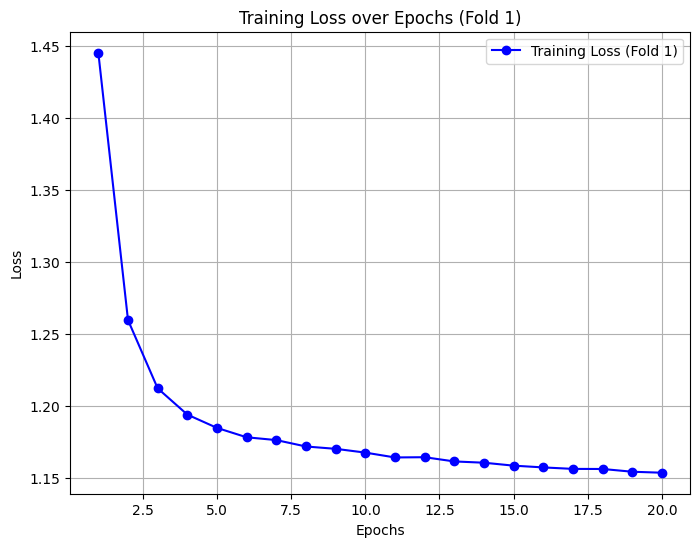

In [214]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT

# Initialize MedCLIP Processor
processor = MedCLIPProcessor()

# Initialize MedCLIP Model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using MedCLIP's image encoder
def process_images_with_medclip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the MedCLIP processor
        inputs = processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using MedCLIP's image encoder
            image_features = model.vision_model(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using MedCLIP
embeddings = process_images_with_medclip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.00009)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_B, all_labels_B = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_B.extend(probabilities)
            all_labels_B.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_B, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_B, all_predictions)
    precision = precision_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_B, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [215]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("Hybrid: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


Hybrid: Average metrics across five folds:
    index        0
 Accuracy 0.553442
Precision 0.500043
   Recall 0.529155
 F1 Score 0.503346


In [ ]:
MedCLIP: Average metrics across five folds:
    index        0
 Accuracy 0.520701
Precision 0.496286
   Recall 0.510943
 F1 Score 0.475773

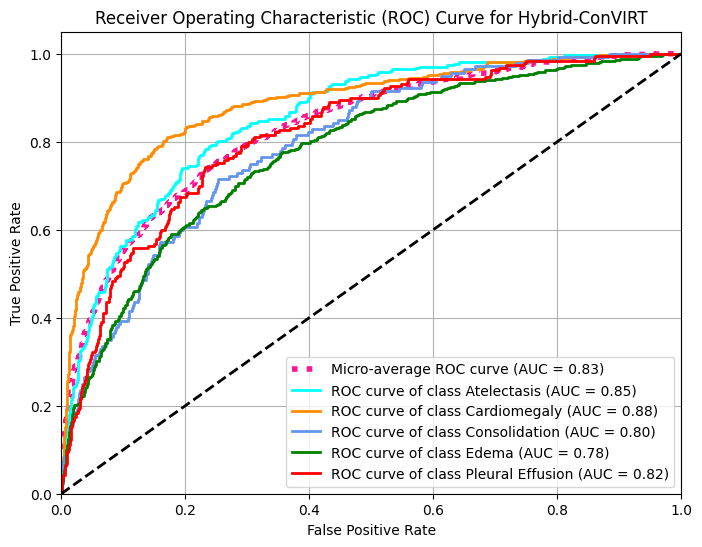

In [216]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_B = np.array(all_probabilities_B)  # Shape: (N_samples, n_classes)
all_labels_all_folds_B = np.array(all_labels_B)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_B = label_binarize(all_labels_all_folds_B, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_B[:, i], all_probabilities_all_folds_B[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_B.ravel(), all_probabilities_all_folds_B.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


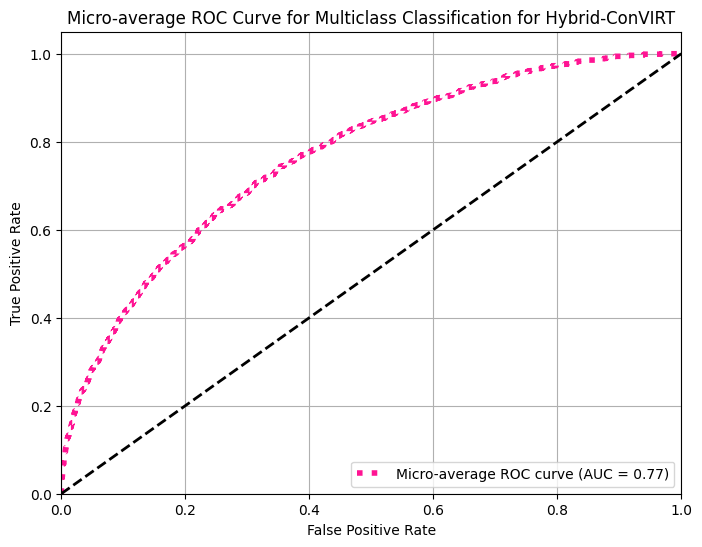

0.7667018497000283


In [267]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_B = label_binarize(all_labels_B, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_B.ravel(), np.array(all_probabilities_B).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(roc_auc_micro)


## MEdCLIP with thresholding

In [1]:
!pip install git+https://github.com/RyanWangZf/MedCLIP.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/RyanWangZf/MedCLIP.git to /tmp/pip-req-build-rnzk31__
  Running command git clone --filter=blob:none --quiet https://github.com/RyanWangZf/MedCLIP.git /tmp/pip-req-build-rnzk31__
  Resolved https://github.com/RyanWangZf/MedCLIP.git to commit 9c3396f20d5d54e4fae241b8cb06ca45848e98c9
  Preparing metadata (setup.py) ... done
  Using cached transformers-4.24.0-py3-none-any.whl (5.5 MB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.1
    Uninstalling tokenizers-0.20.1:
      Successfully uninstalled tokenizers-0.20.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.2
    Uninstalling transformers-4.45.2:
      Successfully uninstalled transformers-4.45.2


In [30]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 258.3/258.3 KB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [45]:
pwd

'/imaging/students/Abhi/project'

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: Futu

load model weight from: ./pretrained/medclip-vit


/tmp/ipykernel_445424/1336315428.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.4905
Epoch 2/20, Fold 1, Loss: 1.2718
Epoch 3/20, Fold 1, Loss: 1.2199
Epoch 4/20, Fold 1, Loss: 1.1988
Epoch 5/20, Fold 1, Loss: 1.1882
Epoch 6/20, Fold 1, Loss: 1.1827
Epoch 7/20, Fold 1, Loss: 1.1776
Epoch 8/20, Fold 1, Loss: 1.1735
Epoch 9/20, Fold 1, Loss: 1.1710
Epoch 10/20, Fold 1, Loss: 1.1698
Epoch 11/20, Fold 1, Loss: 1.1678
Epoch 12/20, Fold 1, Loss: 1.1649
Epoch 13/20, Fold 1, Loss: 1.1630
Epoch 14/20, Fold 1, Loss: 1.1623
Epoch 15/20, Fold 1, Loss: 1.1606
Epoch 16/20, Fold 1, Loss: 1.1596
Epoch 17/20, Fold 1, Loss: 1.1583
Epoch 18/20, Fold 1, Loss: 1.1561
Epoch 19/20, Fold 1, Loss: 1.1561
Epoch 20/20, Fold 1, Loss: 1.1540

Fold 1 - Threshold = 0.4:
Accuracy: 0.6123, Precision: 0.5569, Recall: 0.5918, F1 Score: 0.5630
Confusion Matrix:
[[162   9  13  11  39]
 [ 24 337  31  52  24]
 [ 13  12  65  10   8]
 [ 76  65  43 223  26]
 [ 42  11  16  12  61]]

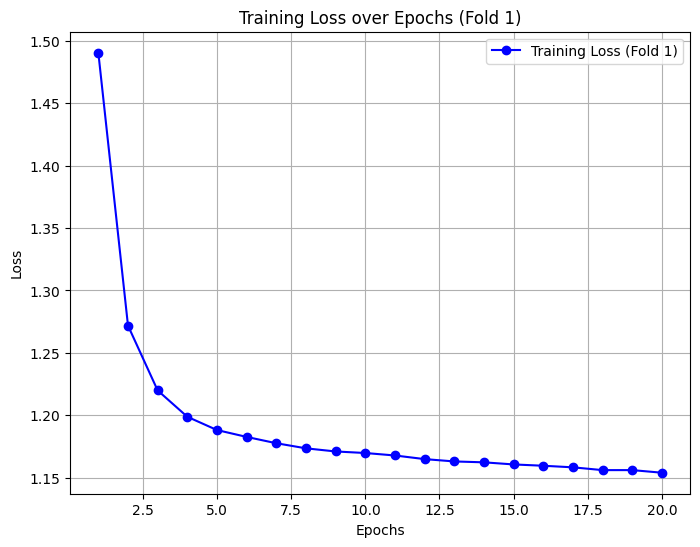

In [177]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT

# Initialize MedCLIP Processor
processor = MedCLIPProcessor()

# Initialize MedCLIP Model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using MedCLIP's image encoder
def process_images_with_medclip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the MedCLIP processor
        inputs = processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using MedCLIP's image encoder
            image_features = model.vision_model(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using MedCLIP
embeddings = process_images_with_medclip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.00009)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_B, all_labels_B = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_B.extend(probabilities)
            all_labels_B.extend(labels.numpy())

    # Evaluate at different thresholds for multi-class classification
    fold_results = []
    for threshold in [0.4, 0.5, 0.65]:
        all_predictions = []
        for probs in all_probabilities_B:
            max_prob = np.max(probs)
            if max_prob >= threshold:
                all_predictions.append(np.argmax(probs))
            else:
                # If no class exceeds the threshold, mark as "uncertain" (-1 or some fallback mechanism)
                all_predictions.append(-1)

        # Filter out "uncertain" predictions from the metrics
        valid_predictions = [p for p in all_predictions if p != -1]
        valid_labels = [l for i, l in enumerate(all_labels_B) if all_predictions[i] != -1]

        if len(valid_predictions) > 0:
            accuracy = accuracy_score(valid_labels, valid_predictions)
            precision = precision_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            recall = recall_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            f1 = f1_score(valid_labels, valid_predictions, average='macro', zero_division=0)

            cm = confusion_matrix(valid_labels, valid_predictions)
        else:
            accuracy = precision = recall = f1 = 0
            cm = np.zeros((5, 5))

        fold_results.append({
            'Fold': fold_number,
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

        print(f"\nFold {fold_number} - Threshold = {threshold}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")

    # Store the fold results for each threshold
    all_fold_results.extend(fold_results)
    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [178]:
# Remove the 'Fold' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold']).groupby('Threshold').mean().reset_index()

# Display the average metrics table
print("Hybrid-ConVIRT: Average metrics across five folds for each threshold:")
print(average_metrics.to_string(index=False))


Hybrid-ConVIRT: Average metrics across five folds for each threshold:
 Threshold  Accuracy  Precision   Recall  F1 Score                                                                                                                                                  Confusion Matrix
      0.40  0.625691   0.555077 0.583131  0.562372 [[150.2, 11.2, 11.0, 20.2, 36.0], [22.2, 364.8, 19.4, 69.4, 17.2], [13.6, 9.2, 49.4, 14.8, 12.4], [64.2, 72.6, 37.8, 257.0, 26.8], [31.4, 9.4, 15.8, 12.6, 60.2]]
      0.50  0.690613   0.606819 0.630549  0.612928          [[110.8, 8.4, 5.0, 10.6, 18.8], [11.6, 328.8, 9.6, 40.8, 5.8], [5.8, 7.0, 36.4, 8.2, 5.6], [36.4, 57.0, 22.0, 174.2, 12.2], [19.0, 8.0, 9.2, 5.8, 35.4]]
      0.65  0.778112   0.684301 0.667175  0.661376                  [[61.4, 5.0, 2.0, 3.4, 6.4], [3.8, 268.0, 4.6, 9.0, 0.8], [1.8, 4.4, 24.0, 1.6, 1.4], [15.0, 34.2, 10.0, 62.2, 1.6], [6.6, 5.6, 3.4, 1.4, 12.6]]


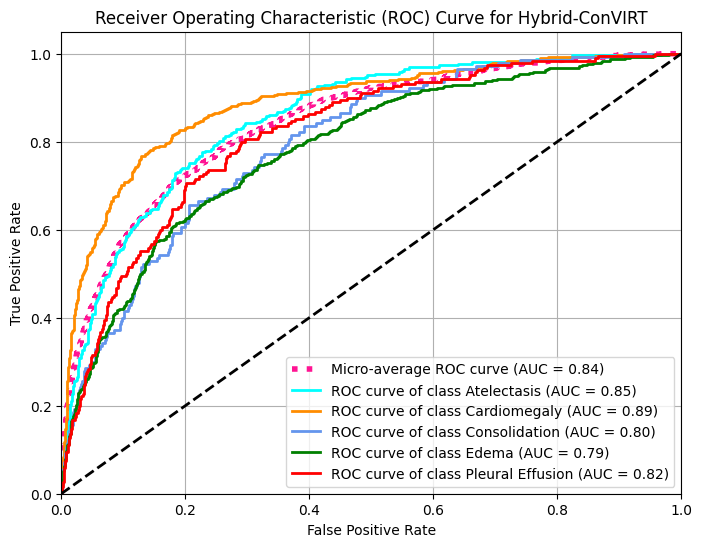

In [179]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_B = np.array(all_probabilities_B)  # Shape: (N_samples, n_classes)
all_labels_all_folds_B = np.array(all_labels_B)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_B = label_binarize(all_labels_all_folds_B, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_B[:, i], all_probabilities_all_folds_B[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_B.ravel(), all_probabilities_all_folds_B.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


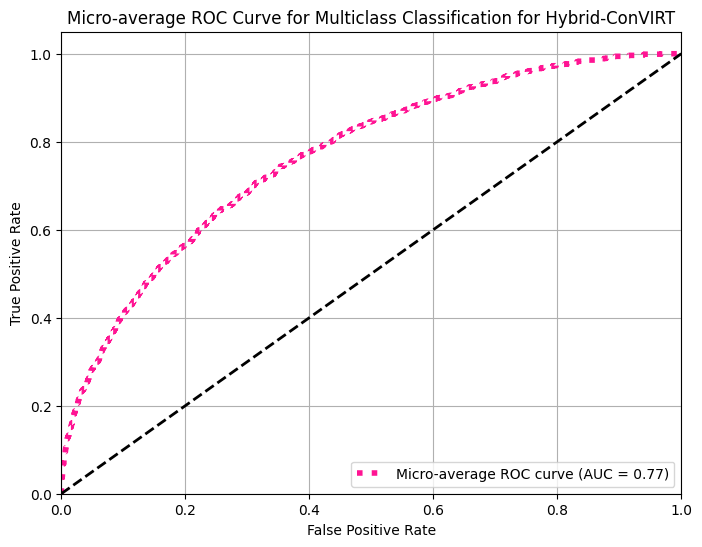

0.7667018497000283


In [266]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_B = label_binarize(all_labels_B, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_B.ravel(), np.array(all_probabilities_B).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(roc_auc_micro)


## MedCLIP2

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: Futu

load model weight from: ./pretrained/medclip-vit


/tmp/ipykernel_445424/1371226613.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.2524
Epoch 2/20, Fold 1, Loss: 1.2088
Epoch 3/20, Fold 1, Loss: 1.1841
Epoch 4/20, Fold 1, Loss: 1.1895
Epoch 5/20, Fold 1, Loss: 1.1801
Epoch 6/20, Fold 1, Loss: 1.1640
Epoch 7/20, Fold 1, Loss: 1.1626
Epoch 8/20, Fold 1, Loss: 1.1610
Epoch 9/20, Fold 1, Loss: 1.1598
Epoch 10/20, Fold 1, Loss: 1.1441
Epoch 11/20, Fold 1, Loss: 1.1446
Epoch 12/20, Fold 1, Loss: 1.1408
Epoch 13/20, Fold 1, Loss: 1.1452
Epoch 14/20, Fold 1, Loss: 1.1397
Epoch 15/20, Fold 1, Loss: 1.1360
Epoch 16/20, Fold 1, Loss: 1.1281
Epoch 17/20, Fold 1, Loss: 1.1340
Epoch 18/20, Fold 1, Loss: 1.1226
Epoch 19/20, Fold 1, Loss: 1.1232
Epoch 20/20, Fold 1, Loss: 1.1251

Fold 1:
Accuracy: 0.5316, Precision: 0.5123, Recall: 0.5086, F1 Score: 0.4902
Confusion Matrix:
[[154   5  14  40  95]
 [ 35 276  23 183  75]
 [ 10   9  54  36  31]
 [ 78  35  37 403  86]
 [ 30   9  14  31 107]]
Fold 2: Train siz

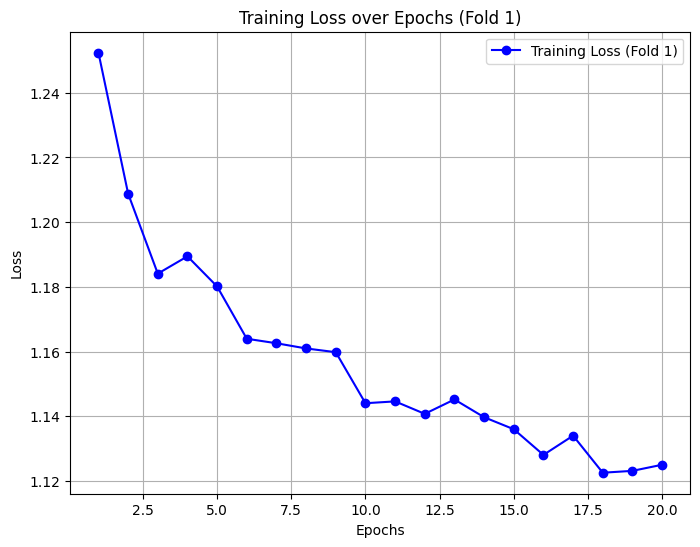

In [218]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT

# Initialize MedCLIP Processor
processor = MedCLIPProcessor()

# Initialize MedCLIP Model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using MedCLIP's image encoder
def process_images_with_medclip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the MedCLIP processor
        inputs = processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using MedCLIP's image encoder
            image_features = model.vision_model(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using MedCLIP
embeddings = process_images_with_medclip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.001)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_B, all_labels_B = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_B.extend(probabilities)
            all_labels_B.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_B, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_B, all_predictions)
    precision = precision_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_B, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [219]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("MedCLIP: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


MedCLIP: Average metrics across five folds:
    index        0
 Accuracy 0.520701
Precision 0.496286
   Recall 0.510943
 F1 Score 0.475773


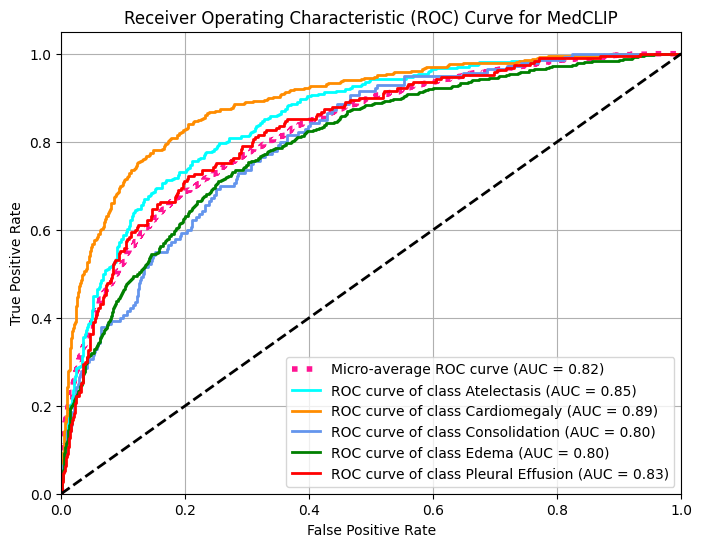

In [220]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_A = np.array(all_probabilities_A)  # Shape: (N_samples, n_classes)
all_labels_all_folds_A = np.array(all_labels_A)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_A = label_binarize(all_labels_all_folds_A, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_A[:, i], all_probabilities_all_folds_A[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_A.ravel(), all_probabilities_all_folds_A.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MedCLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


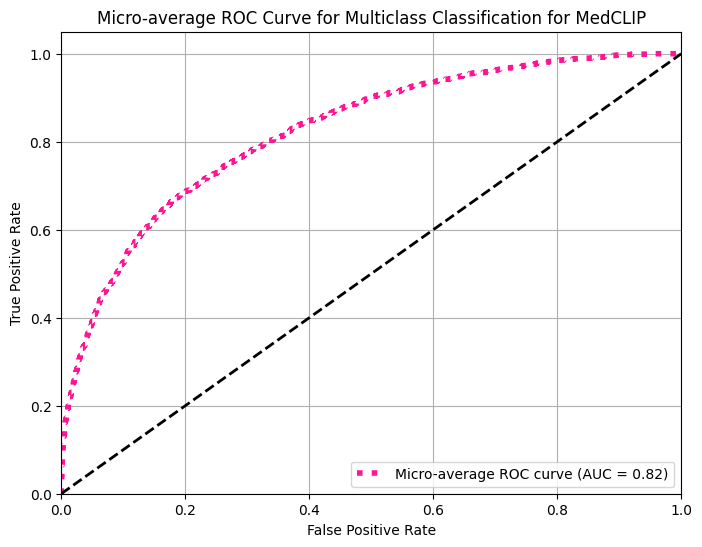

In [221]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_A = label_binarize(all_labels_A, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_A.ravel(), np.array(all_probabilities_A).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for MedCLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: Futu

load model weight from: ./pretrained/medclip-vit


/tmp/ipykernel_445424/54010672.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.2563
Epoch 2/20, Fold 1, Loss: 1.1983
Epoch 3/20, Fold 1, Loss: 1.1860
Epoch 4/20, Fold 1, Loss: 1.1839
Epoch 5/20, Fold 1, Loss: 1.1749
Epoch 6/20, Fold 1, Loss: 1.1683
Epoch 7/20, Fold 1, Loss: 1.1567
Epoch 8/20, Fold 1, Loss: 1.1561
Epoch 9/20, Fold 1, Loss: 1.1568
Epoch 10/20, Fold 1, Loss: 1.1475
Epoch 11/20, Fold 1, Loss: 1.1468
Epoch 12/20, Fold 1, Loss: 1.1367
Epoch 13/20, Fold 1, Loss: 1.1406
Epoch 14/20, Fold 1, Loss: 1.1345
Epoch 15/20, Fold 1, Loss: 1.1348
Epoch 16/20, Fold 1, Loss: 1.1308
Epoch 17/20, Fold 1, Loss: 1.1331
Epoch 18/20, Fold 1, Loss: 1.1225
Epoch 19/20, Fold 1, Loss: 1.1267
Epoch 20/20, Fold 1, Loss: 1.1267

Fold 1 - Threshold = 0.4:
Accuracy: 0.5812, Precision: 0.5443, Recall: 0.5325, F1 Score: 0.5016
Confusion Matrix:
[[221   6  13  23  12]
 [ 60 317  23 109   4]
 [ 24   9  62  19   1]
 [140  51  46 328   6]
 [ 81  10  18  28  20]]

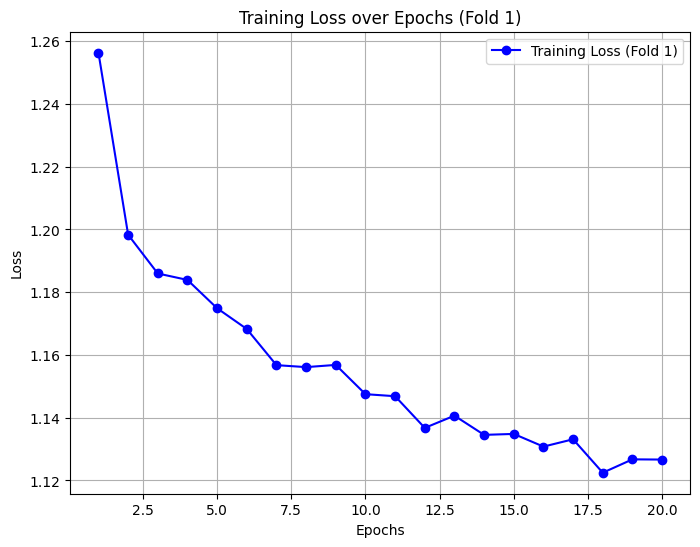

In [114]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT

# Initialize MedCLIP Processor
processor = MedCLIPProcessor()

# Initialize MedCLIP Model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using MedCLIP's image encoder
def process_images_with_medclip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the MedCLIP processor
        inputs = processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using MedCLIP's image encoder
            image_features = model.vision_model(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using MedCLIP
embeddings = process_images_with_medclip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.001)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_A, all_labels_A = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_A.extend(probabilities)
            all_labels_A.extend(labels.numpy())

    # Evaluate at different thresholds for multi-class classification
    fold_results = []
    for threshold in [0.4, 0.5, 0.65]:
        all_predictions = []
        for probs in all_probabilities_A:
            max_prob = np.max(probs)
            if max_prob >= threshold:
                all_predictions.append(np.argmax(probs))
            else:
                # If no class exceeds the threshold, mark as "uncertain" (-1 or some fallback mechanism)
                all_predictions.append(-1)

        # Filter out "uncertain" predictions from the metrics
        valid_predictions = [p for p in all_predictions if p != -1]
        valid_labels = [l for i, l in enumerate(all_labels_A) if all_predictions[i] != -1]

        if len(valid_predictions) > 0:
            accuracy = accuracy_score(valid_labels, valid_predictions)
            precision = precision_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            recall = recall_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            f1 = f1_score(valid_labels, valid_predictions, average='macro', zero_division=0)

            cm = confusion_matrix(valid_labels, valid_predictions)
        else:
            accuracy = precision = recall = f1 = 0
            cm = np.zeros((5, 5))

        fold_results.append({
            'Fold': fold_number,
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

        print(f"\nFold {fold_number} - Threshold = {threshold}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")

    # Store the fold results for each threshold
    all_fold_results.extend(fold_results)
    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [115]:
# Remove the 'Fold' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold']).groupby('Threshold').mean().reset_index()

# Display the average metrics table
print("MedCLIP: Average metrics across five folds for each threshold:")
print(average_metrics.to_string(index=False))


MedCLIP: Average metrics across five folds for each threshold:
 Threshold  Accuracy  Precision   Recall  F1 Score                                                                                                                                                    Confusion Matrix
      0.40  0.571636   0.546611 0.537430  0.506175 [[141.8, 14.4, 41.2, 18.6, 28.6], [22.8, 396.6, 43.0, 54.8, 10.2], [12.0, 12.2, 64.0, 15.2, 8.4], [65.2, 104.2, 93.0, 224.4, 22.4], [31.4, 14.8, 32.6, 14.6, 52.8]]
      0.50  0.630502   0.598880 0.573703  0.544282       [[112.2, 10.2, 26.2, 11.2, 16.0], [14.2, 361.2, 25.6, 36.4, 5.8], [6.2, 8.2, 54.2, 8.4, 5.2], [41.2, 79.6, 54.0, 157.8, 10.0], [22.4, 10.4, 22.6, 7.4, 33.2]]
      0.65  0.714537   0.652487 0.601893  0.578510                [[69.4, 6.4, 9.8, 3.0, 6.2], [6.4, 300.0, 10.6, 15.4, 1.2], [3.4, 5.4, 37.2, 3.6, 1.6], [17.2, 50.2, 25.2, 78.8, 3.0], [10.2, 6.6, 10.6, 2.6, 13.4]]


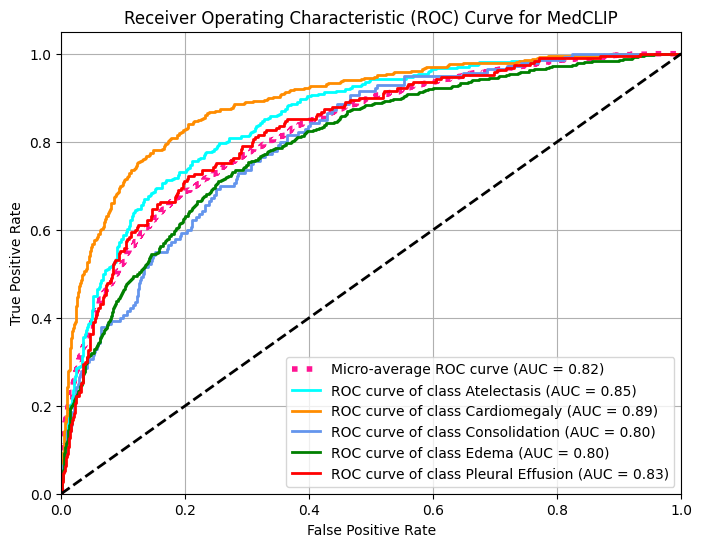

In [116]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_A = np.array(all_probabilities_A)  # Shape: (N_samples, n_classes)
all_labels_all_folds_A = np.array(all_labels_A)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_A = label_binarize(all_labels_all_folds_A, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_A[:, i], all_probabilities_all_folds_A[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_A.ravel(), all_probabilities_all_folds_A.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MedCLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


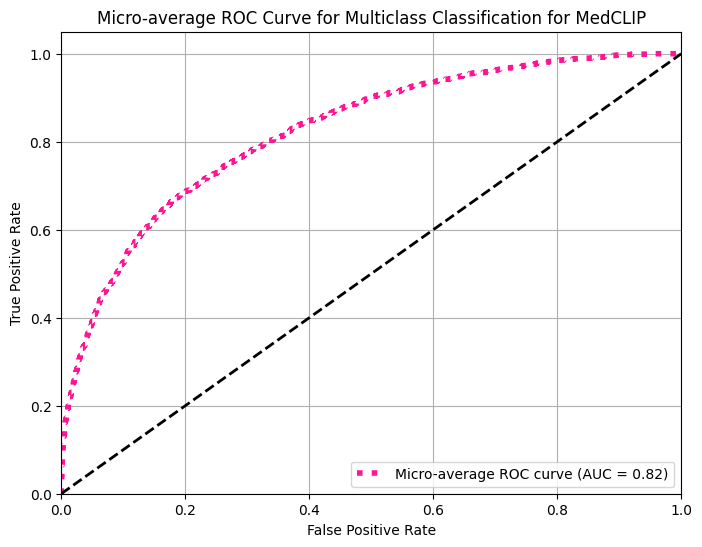

In [117]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_A = label_binarize(all_labels_A, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_A.ravel(), np.array(all_probabilities_A).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for MedCLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## CLIP

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user

Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.8733
Epoch 2/20, Fold 1, Loss: 1.7931
Epoch 3/20, Fold 1, Loss: 1.7454
Epoch 4/20, Fold 1, Loss: 1.7614
Epoch 5/20, Fold 1, Loss: 1.6324
Epoch 6/20, Fold 1, Loss: 1.6637
Epoch 7/20, Fold 1, Loss: 1.6333
Epoch 8/20, Fold 1, Loss: 1.6722
Epoch 9/20, Fold 1, Loss: 1.6527
Epoch 10/20, Fold 1, Loss: 1.6209
Epoch 11/20, Fold 1, Loss: 1.5942
Epoch 12/20, Fold 1, Loss: 1.6528
Epoch 13/20, Fold 1, Loss: 1.6010
Epoch 14/20, Fold 1, Loss: 1.6100
Epoch 15/20, Fold 1, Loss: 1.6358
Epoch 16/20, Fold 1, Loss: 1.6484
Epoch 17/20, Fold 1, Loss: 1.7316
Epoch 18/20, Fold 1, Loss: 1.5852
Epoch 19/20, Fold 1, Loss: 1.6572
Epoch 20/20, Fold 1, Loss: 1.6410

Fold 1:
Accuracy: 0.2594, Precision: 0.2918, Recall: 0.2901, F1 Score: 0.2386
Confusion Matrix:
[[117  33  67   9  82]
 [110 219 114  23 126]
 [ 27  20  47  10  36]
 [168 141 157  46 127]
 [ 60  30  37   8  56]]
Fold 2: Train siz

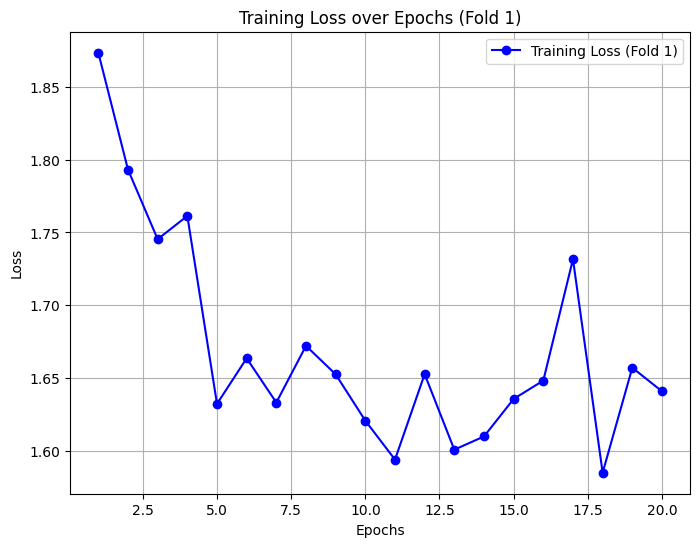

In [258]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from transformers import CLIPProcessor, CLIPModel

# Initialize the CLIP Processor and Model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using CLIP's image encoder
def process_images_with_clip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the CLIP processor
        inputs = clip_processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using CLIP's image encoder
            image_features = clip_model.get_image_features(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using CLIP
embeddings = process_images_with_clip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.05)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_C, all_labels_C = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_C.extend(probabilities)
            all_labels_C.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_C, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_C, all_predictions)
    precision = precision_score(all_labels_C, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_C, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_C, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_C, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [259]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("CLIP: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


CLIP: Average metrics across five folds:
    index        0
 Accuracy 0.271311
Precision 0.308125
   Recall 0.277822
 F1 Score 0.220086


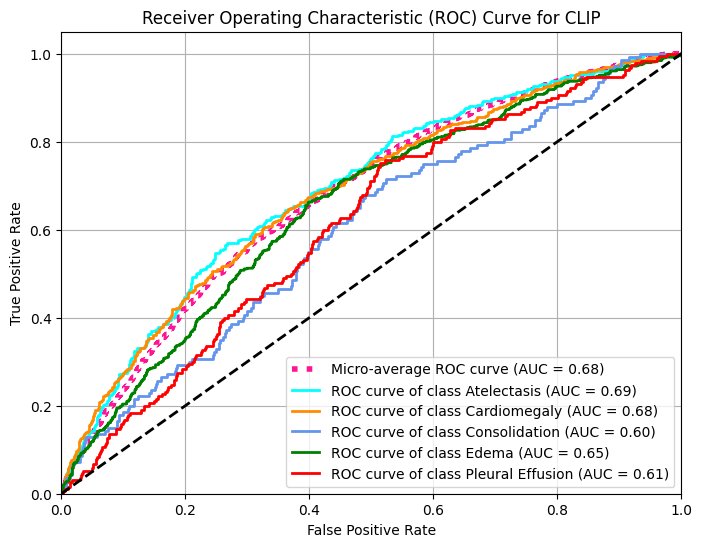

In [260]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_C = np.array(all_probabilities_C)  # Shape: (N_samples, n_classes)
all_labels_all_folds_C = np.array(all_labels_C)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_C = label_binarize(all_labels_all_folds_C, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_C[:, i], all_probabilities_all_folds_C[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_C.ravel(), all_probabilities_all_folds_C.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


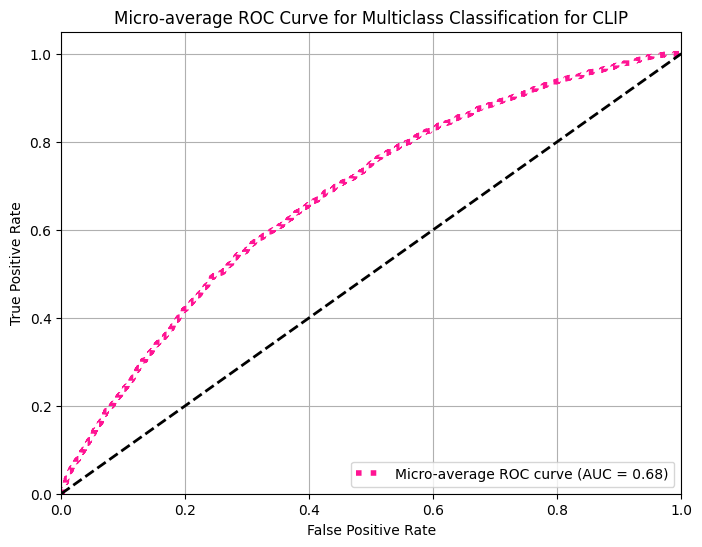

In [261]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_C = label_binarize(all_labels_C, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_C.ravel(), np.array(all_probabilities_C).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for CLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [132]:
# Initialize the CLIP Processor and Model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model.cuda()

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

/tmp/ipykernel_445424/3912789074.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 2.4252
Epoch 2/20, Fold 1, Loss: 2.0320
Epoch 3/20, Fold 1, Loss: 2.1414
Epoch 4/20, Fold 1, Loss: 2.1792
Epoch 5/20, Fold 1, Loss: 2.2812
Epoch 6/20, Fold 1, Loss: 1.9597
Epoch 7/20, Fold 1, Loss: 2.1173
Epoch 8/20, Fold 1, Loss: 2.1788
Epoch 9/20, Fold 1, Loss: 2.2228
Epoch 10/20, Fold 1, Loss: 2.0613
Epoch 11/20, Fold 1, Loss: 2.0014
Epoch 12/20, Fold 1, Loss: 2.1310
Epoch 13/20, Fold 1, Loss: 2.1200
Epoch 14/20, Fold 1, Loss: 2.2445
Epoch 15/20, Fold 1, Loss: 2.0888
Epoch 16/20, Fold 1, Loss: 1.9017
Epoch 17/20, Fold 1, Loss: 2.0762
Epoch 18/20, Fold 1, Loss: 1.9102
Epoch 19/20, Fold 1, Loss: 1.9549
Epoch 20/20, Fold 1, Loss: 2.1053

Fold 1 - Threshold = 0.4:
Accuracy: 0.5612, Precision: 0.4980, Recall: 0.5092, F1 Score: 0.4946
Confusion Matrix:
[[129  24  19  32  95]
 [ 16 446  18  64  41]
 [ 11  23  51  29  20]
 [ 65 138  41 310  67]
 [ 33  21  21  21  86]]

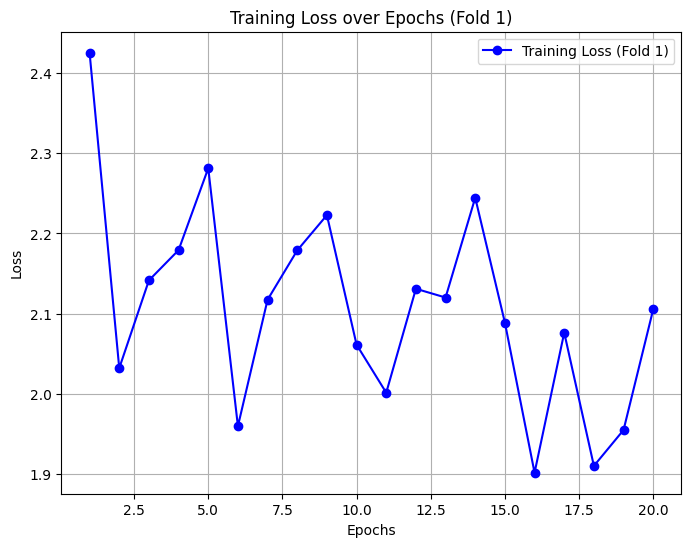

In [133]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from transformers import CLIPProcessor, CLIPModel

# Initialize the CLIP Processor and Model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using MedCLIP's image encoder
def process_images_with_medclip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the MedCLIP processor
        inputs = processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using MedCLIP's image encoder
            image_features = model.vision_model(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using MedCLIP
embeddings = process_images_with_medclip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.025)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_C, all_labels_C = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_C.extend(probabilities)
            all_labels_C.extend(labels.numpy())

    # Evaluate at different thresholds for multi-class classification
    fold_results = []
    for threshold in [0.4, 0.5, 0.65]:
        all_predictions = []
        for probs in all_probabilities_C:
            max_prob = np.max(probs)
            if max_prob >= threshold:
                all_predictions.append(np.argmax(probs))
            else:
                # If no class exceeds the threshold, mark as "uncertain" (-1 or some fallback mechanism)
                all_predictions.append(-1)

        # Filter out "uncertain" predictions from the metrics
        valid_predictions = [p for p in all_predictions if p != -1]
        valid_labels = [l for i, l in enumerate(all_labels_C) if all_predictions[i] != -1]

        if len(valid_predictions) > 0:
            accuracy = accuracy_score(valid_labels, valid_predictions)
            precision = precision_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            recall = recall_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            f1 = f1_score(valid_labels, valid_predictions, average='macro', zero_division=0)

            cm = confusion_matrix(valid_labels, valid_predictions)
        else:
            accuracy = precision = recall = f1 = 0
            cm = np.zeros((5, 5))

        fold_results.append({
            'Fold': fold_number,
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

        print(f"\nFold {fold_number} - Threshold = {threshold}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")

    # Store the fold results for each threshold
    all_fold_results.extend(fold_results)
    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [134]:
# Remove the 'Fold' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold']).groupby('Threshold').mean().reset_index()

# Display the average metrics table
print("BioVil: Average metrics across five folds for each threshold:")
print(average_metrics.to_string(index=False))


BioVil: Average metrics across five folds for each threshold:
 Threshold  Accuracy  Precision   Recall  F1 Score                                                                                                                                                    Confusion Matrix
      0.40  0.416122   0.485384 0.399041  0.326361 [[176.4, 29.6, 58.6, 13.4, 27.4], [50.4, 385.2, 99.2, 41.0, 11.8], [40.0, 24.4, 56.4, 9.4, 7.4], [169.4, 175.0, 142.0, 118.0, 24.2], [73.2, 27.2, 47.6, 7.6, 30.4]]
      0.50  0.425300   0.504640 0.400988  0.328416 [[172.4, 28.0, 55.8, 12.2, 23.6], [48.0, 378.8, 95.8, 36.0, 10.8], [36.8, 23.4, 54.2, 8.2, 6.4], [156.8, 165.0, 135.4, 106.2, 19.4], [70.0, 25.4, 45.2, 6.0, 27.4]]
      0.65  0.447027   0.529932 0.406943  0.332877    [[157.6, 23.4, 49.0, 8.4, 17.0], [38.2, 359.8, 85.4, 24.2, 6.2], [32.2, 19.2, 47.2, 5.4, 3.8], [135.4, 142.4, 117.6, 82.2, 12.2], [63.6, 21.8, 38.0, 3.6, 21.0]]


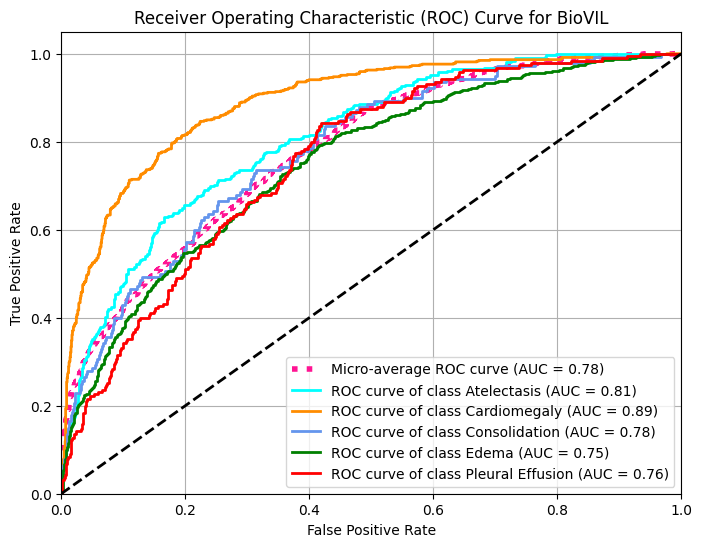

In [135]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_C = np.array(all_probabilities_C)  # Shape: (N_samples, n_classes)
all_labels_all_folds_C = np.array(all_labels_C)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_C = label_binarize(all_labels_all_folds_C, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_C[:, i], all_probabilities_all_folds_C[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_C.ravel(), all_probabilities_all_folds_C.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for BioVIL')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


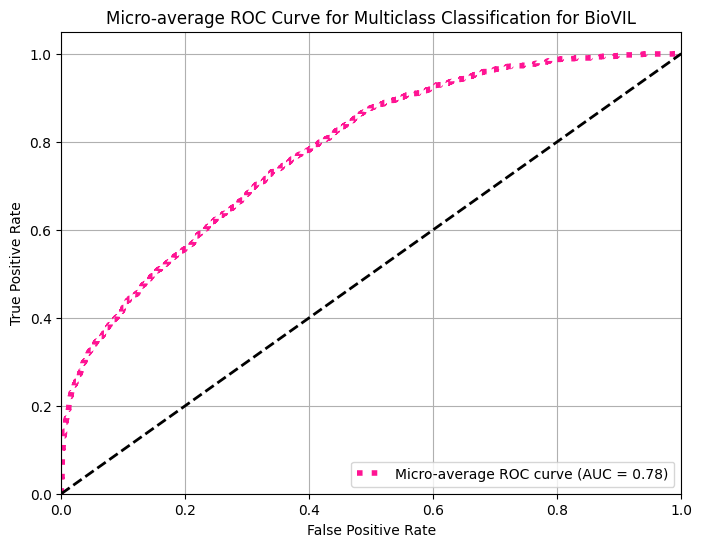

In [136]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_C = label_binarize(all_labels_C, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_C.ravel(), np.array(all_probabilities_C).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for BioVIL')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## CLIP(hy)

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user

Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.5658
Epoch 2/20, Fold 1, Loss: 1.5087
Epoch 3/20, Fold 1, Loss: 1.4834
Epoch 4/20, Fold 1, Loss: 1.4662
Epoch 5/20, Fold 1, Loss: 1.4511
Epoch 6/20, Fold 1, Loss: 1.4424
Epoch 7/20, Fold 1, Loss: 1.4327
Epoch 8/20, Fold 1, Loss: 1.4217
Epoch 9/20, Fold 1, Loss: 1.4177
Epoch 10/20, Fold 1, Loss: 1.4092
Epoch 11/20, Fold 1, Loss: 1.4060
Epoch 12/20, Fold 1, Loss: 1.3969
Epoch 13/20, Fold 1, Loss: 1.3935
Epoch 14/20, Fold 1, Loss: 1.3914
Epoch 15/20, Fold 1, Loss: 1.3841
Epoch 16/20, Fold 1, Loss: 1.3828
Epoch 17/20, Fold 1, Loss: 1.3794
Epoch 18/20, Fold 1, Loss: 1.3744
Epoch 19/20, Fold 1, Loss: 1.3706
Epoch 20/20, Fold 1, Loss: 1.3667

Fold 1:
Accuracy: 0.3775, Precision: 0.3172, Recall: 0.3154, F1 Score: 0.3134
Confusion Matrix:
[[108  38  36  77  49]
 [ 70 242  56 166  58]
 [ 13  26  25  62  14]
 [ 81 126  74 298  60]
 [ 46  27  24  61  33]]
Fold 2: Train siz

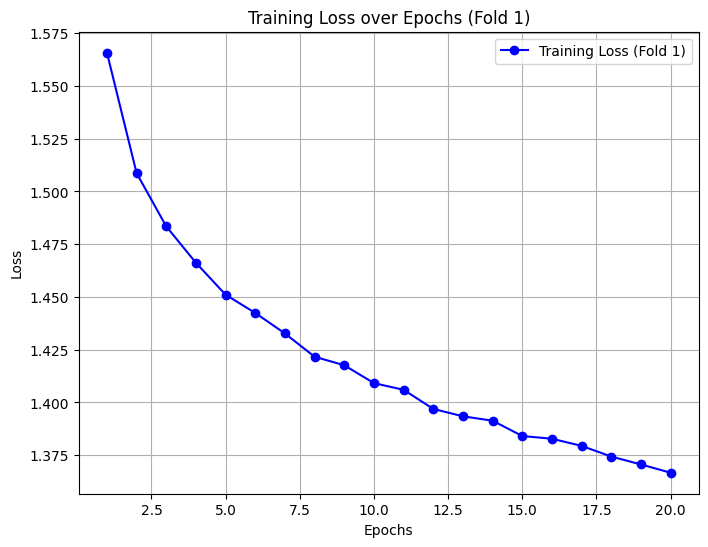

In [256]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from transformers import CLIPProcessor, CLIPModel

# Initialize the CLIP Processor and Model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using CLIP's image encoder
def process_images_with_clip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the CLIP processor
        inputs = clip_processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using CLIP's image encoder
            image_features = clip_model.get_image_features(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using CLIP
embeddings = process_images_with_clip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=16, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=16, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.0015)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_D, all_labels_D = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_D.extend(probabilities)
            all_labels_D.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_D, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_D, all_predictions)
    precision = precision_score(all_labels_D, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_D, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_D, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_D, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [257]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("BioVIL: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


BioVIL: Average metrics across five folds:
    index        0
 Accuracy 0.344597
Precision 0.316214
   Recall 0.313018
 F1 Score 0.295325


In [ ]:
CLIP: Average metrics across five folds:
    index        0
 Accuracy 0.345670
Precision 0.302387
   Recall 0.293009
 F1 Score 0.263036

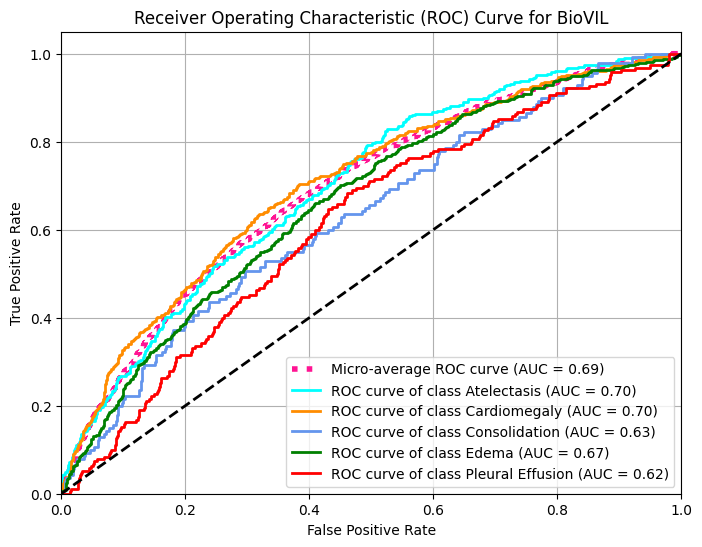

In [262]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_D = np.array(all_probabilities_D)  # Shape: (N_samples, n_classes)
all_labels_all_folds_D = np.array(all_labels_D)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_D = label_binarize(all_labels_all_folds_D, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_D[:, i], all_probabilities_all_folds_D[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_D.ravel(), all_probabilities_all_folds_D.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for BioVIL')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


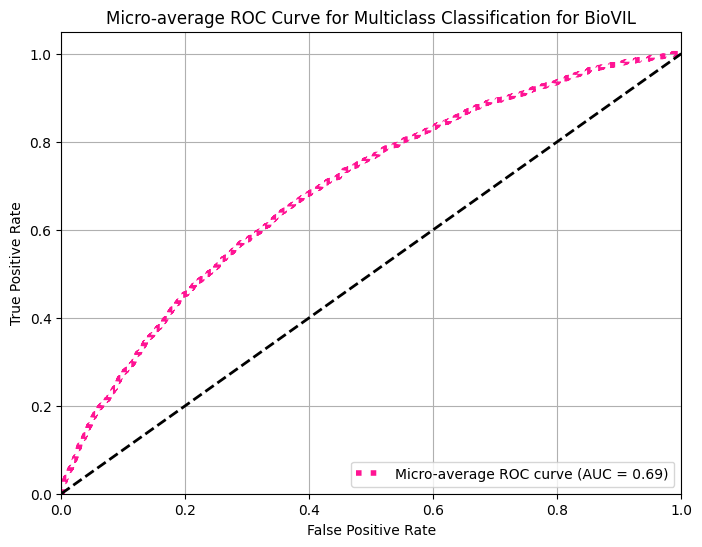

In [263]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_D = label_binarize(all_labels_D, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_D.ravel(), np.array(all_probabilities_D).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for BioVIL')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [123]:
import torch
import torch.nn as nn
from transformers import ViTModel, ViTConfig
from torchvision import transforms
from PIL import Image

# Define the image encoder using ViT as per your model
class ImageEncoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        config = ViTConfig.from_pretrained('google/vit-base-patch16-224')
        config.output_hidden_states = False  # Set this according to your needs
        self.vit = ViTModel(config)
        self.fc = nn.Linear(config.hidden_size, output_dim)  # Fully connected layer to get the desired output dimension

    def forward(self, x):
        outputs = self.vit(x)
        return self.fc(outputs.last_hidden_state[:, 0, :])  # Use the [CLS] token for image representation

# Load the checkpoint and extract the image encoder
checkpoint_path = "checkpoint_epoch_60.pth"
checkpoint = torch.load(checkpoint_path)

# Initialize the image encoder model
image_encoder_model = ImageEncoder(output_dim=512)  # Adjust the output dimension if needed
# Filter the state_dict to only get the image encoder weights
image_encoder_state_dict = {k.replace('module.image_encoder.', ''): v for k, v in checkpoint.items() if 'image_encoder' in k}
# Load the weights into the image encoder
image_encoder_model.load_state_dict(image_encoder_state_dict, strict=False)

# Set model to evaluation mode
image_encoder_model.eval()

/tmp/ipykernel_445424/2345059121.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/home/asharma/.local/lib/python3.10/site-packa

ImageEncoder(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_featu

/tmp/ipykernel_445424/3296756489.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.4570
Epoch 2/20, Fold 1, Loss: 1.4058
Epoch 3/20, Fold 1, Loss: 1.3955
Epoch 4/20, Fold 1, Loss: 1.3885
Epoch 5/20, Fold 1, Loss: 1.3825
Epoch 6/20, Fold 1, Loss: 1.3770
Epoch 7/20, Fold 1, Loss: 1.3720
Epoch 8/20, Fold 1, Loss: 1.3670
Epoch 9/20, Fold 1, Loss: 1.3627
Epoch 10/20, Fold 1, Loss: 1.3591
Epoch 11/20, Fold 1, Loss: 1.3550
Epoch 12/20, Fold 1, Loss: 1.3508
Epoch 13/20, Fold 1, Loss: 1.3477
Epoch 14/20, Fold 1, Loss: 1.3438
Epoch 15/20, Fold 1, Loss: 1.3408
Epoch 16/20, Fold 1, Loss: 1.3376
Epoch 17/20, Fold 1, Loss: 1.3343
Epoch 18/20, Fold 1, Loss: 1.3313
Epoch 19/20, Fold 1, Loss: 1.3285
Epoch 20/20, Fold 1, Loss: 1.3256

Fold 1 - Threshold = 0.4:
Accuracy: 0.5188, Precision: 0.4573, Recall: 0.4699, F1 Score: 0.4536
Confusion Matrix:
[[ 86  15   9   9  42]
 [ 17 230  17  36  20]
 [  7  12  23   7  15]
 [ 53  83  21 108  22]
 [ 30  14   8  10  35]]

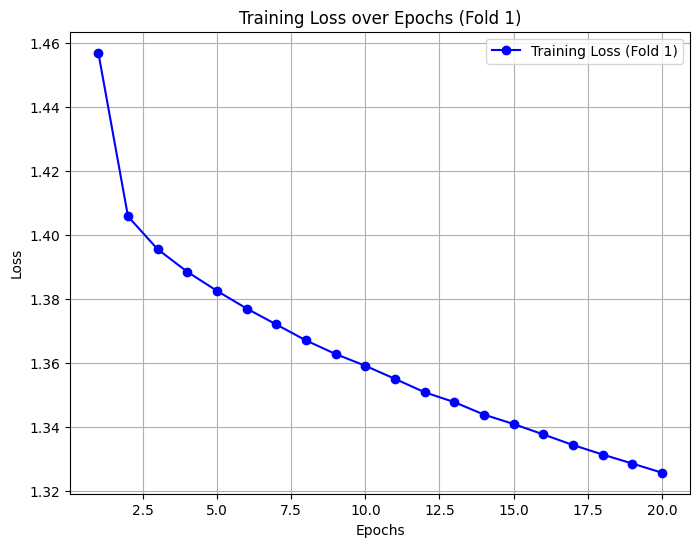

In [124]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from torchvision import transforms  # Ensure you import the transforms

# Assuming you've already loaded your ImageEncoder model with weights
# image_encoder_model is your pre-trained ViT with the loaded weights

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Preprocessing transformations for ViT model
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Move the image encoder model to the GPU
image_encoder_model = image_encoder_model.cuda()

# Function to process images and extract embeddings using your ViT image encoder
def process_images_with_vit(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image for the ViT model
        image_tensor = preprocess(image).unsqueeze(0).cuda()  # Ensure the image tensor is on the GPU

        with torch.no_grad():
            # Extract image features using your ViT image encoder (which is now on the GPU)
            image_features = image_encoder_model(image_tensor)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()  # Move it back to the CPU for storage
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings


# Process images to get embeddings using ViT image encoder
embeddings = process_images_with_vit(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.0005048016434796221)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_D, all_labels_D = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()

            all_probabilities_D.extend(probabilities)
            all_labels_D.extend(labels.numpy())

    # Evaluate at different thresholds for multi-class classification
    fold_results = []
    for threshold in [0.4, 0.5, 0.65]:
        all_predictions = []
        for probs in all_probabilities_D:
            max_prob = np.max(probs)
            if max_prob >= threshold:
                all_predictions.append(np.argmax(probs))
            else:
                # If no class exceeds the threshold, mark as "uncertain" (-1)
                all_predictions.append(-1)

        # Filter out "uncertain" predictions from the metrics
        valid_predictions = [p for p in all_predictions if p != -1]
        valid_labels = [l for i, l in enumerate(all_labels_D) if all_predictions[i] != -1]

        if len(valid_predictions) > 0:
            accuracy = accuracy_score(valid_labels, valid_predictions)
            precision = precision_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            recall = recall_score(valid_labels, valid_predictions, average='macro', zero_division=0)
            f1 = f1_score(valid_labels, valid_predictions, average='macro', zero_division=0)

            cm = confusion_matrix(valid_labels, valid_predictions)
        else:
            accuracy = precision = recall = f1 = 0
            cm = np.zeros((5, 5))

        fold_results.append({
            'Fold': fold_number,
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

        print(f"\nFold {fold_number} - Threshold = {threshold}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")

    # Store the fold results for each threshold
    all_fold_results.extend(fold_results)
    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [125]:
# Remove the 'Fold' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold']).groupby('Threshold').mean().reset_index()

# Display the average metrics table
print("CLIP: Average metrics across five folds for each threshold:")
print(average_metrics.to_string(index=False))


CLIP: Average metrics across five folds for each threshold:
 Threshold  Accuracy  Precision   Recall  F1 Score                                                                                                                                                 Confusion Matrix
      0.40  0.519990   0.446137 0.462988  0.444965 [[76.8, 18.4, 10.2, 13.0, 29.6], [16.8, 247.8, 15.2, 40.8, 14.0], [9.0, 11.0, 21.4, 10.8, 14.0], [47.2, 87.0, 32.6, 109.8, 24.4], [23.6, 13.8, 12.4, 8.2, 33.6]]
      0.50  0.606179   0.504934 0.507477  0.490044               [[32.0, 8.2, 2.6, 4.4, 10.4], [3.2, 176.2, 5.2, 12.8, 5.8], [2.4, 6.4, 10.4, 3.4, 4.8], [16.8, 49.0, 12.6, 39.6, 8.8], [8.2, 7.4, 3.8, 2.6, 16.2]]
      0.65  0.782477   0.641235 0.487031  0.514232                        [[3.2, 2.2, 0.4, 0.0, 1.6], [0.2, 93.4, 0.0, 1.2, 0.6], [0.2, 1.8, 2.2, 0.4, 0.4], [0.8, 14.6, 1.4, 3.8, 0.6], [0.2, 2.2, 0.6, 0.4, 3.4]]


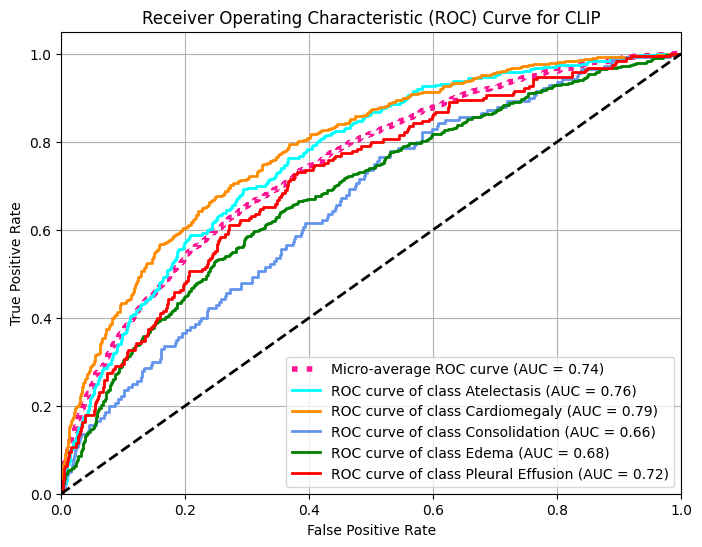

In [126]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_D = np.array(all_probabilities_D)  # Shape: (N_samples, n_classes)
all_labels_all_folds_D = np.array(all_labels_D)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_D = label_binarize(all_labels_all_folds_D, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_D[:, i], all_probabilities_all_folds_D[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_D.ravel(), all_probabilities_all_folds_D.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


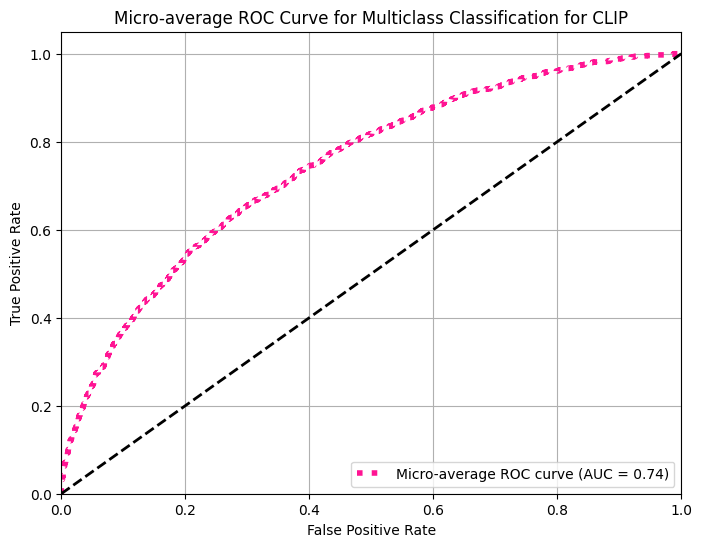

In [127]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_D = label_binarize(all_labels_D, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_D.ravel(), np.array(all_probabilities_D).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for CLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Total ROC

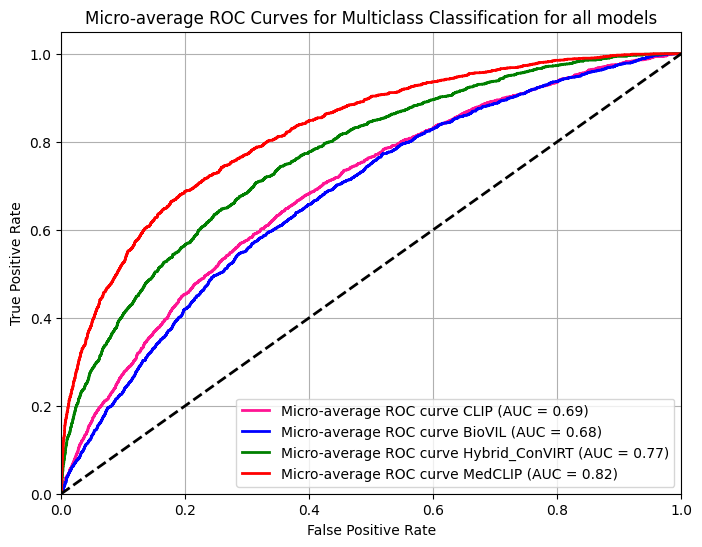

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC computation (assuming same labels for all models)
n_classes = 5  # 5 classes
all_labels_binarized_D = label_binarize(all_labels_D, classes=[0, 1, 2, 3, 4])
all_labels_binarized_C = label_binarize(all_labels_C, classes=[0, 1, 2, 3, 4])
all_labels_binarized_B = label_binarize(all_labels_B, classes=[0, 1, 2, 3, 4])
all_labels_binarized_A = label_binarize(all_labels_A, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area for each model
fpr_micro_D, tpr_micro_D, _ = roc_curve(all_labels_binarized_D.ravel(), np.array(all_probabilities_D).ravel())
roc_auc_micro_D = auc(fpr_micro_D, tpr_micro_D)

fpr_micro_C, tpr_micro_C, _ = roc_curve(all_labels_binarized_C.ravel(), np.array(all_probabilities_C).ravel())
roc_auc_micro_C = auc(fpr_micro_C, tpr_micro_C)

fpr_micro_B, tpr_micro_B, _ = roc_curve(all_labels_binarized_B.ravel(), np.array(all_probabilities_B).ravel())
roc_auc_micro_B = auc(fpr_micro_B, tpr_micro_B)

fpr_micro_A, tpr_micro_A, _ = roc_curve(all_labels_binarized_A.ravel(), np.array(all_probabilities_A).ravel())
roc_auc_micro_A = auc(fpr_micro_A, tpr_micro_A)

# Plot the micro-average ROC curve for all models
plt.figure(figsize=(8, 6))

# Model D
plt.plot(fpr_micro_D, tpr_micro_D, color='deeppink', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve CLIP (AUC = {roc_auc_micro_D:.2f})')

# Model C
plt.plot(fpr_micro_C, tpr_micro_C, color='blue', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve BioVIL (AUC = {roc_auc_micro_C:.2f})')

# Model B
plt.plot(fpr_micro_B, tpr_micro_B, color='green', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve Hybrid_ConVIRT (AUC = {roc_auc_micro_B:.2f})')

# Model A
plt.plot(fpr_micro_A, tpr_micro_A, color='red', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve MedCLIP (AUC = {roc_auc_micro_A:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curves for Multiclass Classification for all models')
plt.legend(loc="lower right")
plt.grid(True)

# Show plot
plt.show()


## Hybrid

In [ ]:
import torch
import torch.nn as nn
from transformers import ViTModel, ViTConfig
from torchvision import transforms
from PIL import Image

# Define the image encoder using ViT as per your model
class ImageEncoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        config = ViTConfig.from_pretrained('google/vit-base-patch16-224')
        config.output_hidden_states = False  # Set this according to your needs
        self.vit = ViTModel(config)
        self.fc = nn.Linear(config.hidden_size, output_dim)  # Fully connected layer to get the desired output dimension

    def forward(self, x):
        outputs = self.vit(x)
        return self.fc(outputs.last_hidden_state[:, 0, :])  # Use the [CLS] token for image representation

# Load the checkpoint and extract the image encoder
checkpoint_path = "checkpoint_epoch_60.pth"
checkpoint = torch.load(checkpoint_path)

# Initialize the image encoder model
image_encoder_model = ImageEncoder(output_dim=512)  # Adjust the output dimension if needed
# Filter the state_dict to only get the image encoder weights
image_encoder_state_dict = {k.replace('module.image_encoder.', ''): v for k, v in checkpoint.items() if 'image_encoder' in k}
# Load the weights into the image encoder
image_encoder_model.load_state_dict(image_encoder_state_dict, strict=False)

# Set model to evaluation mode
image_encoder_model.eval()

/tmp/ipykernel_348576/1351201443.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.4385
Epoch 2/20, Fold 1, Loss: 1.3980
Epoch 3/20, Fold 1, Loss: 1.3863
Epoch 4/20, Fold 1, Loss: 1.3766
Epoch 5/20, Fold 1, Loss: 1.3683
Epoch 6/20, Fold 1, Loss: 1.3612
Epoch 7/20, Fold 1, Loss: 1.3543
Epoch 8/20, Fold 1, Loss: 1.3475
Epoch 9/20, Fold 1, Loss: 1.3417
Epoch 10/20, Fold 1, Loss: 1.3362
Epoch 11/20, Fold 1, Loss: 1.3311
Epoch 12/20, Fold 1, Loss: 1.3258
Epoch 13/20, Fold 1, Loss: 1.3213
Epoch 14/20, Fold 1, Loss: 1.3165
Epoch 15/20, Fold 1, Loss: 1.3131
Epoch 16/20, Fold 1, Loss: 1.3075
Epoch 17/20, Fold 1, Loss: 1.3051
Epoch 18/20, Fold 1, Loss: 1.3011
Epoch 19/20, Fold 1, Loss: 1.2984
Epoch 20/20, Fold 1, Loss: 1.2947

Fold 1 - Threshold = 0.4:
Accuracy: 0.4241, Precision: 0.3869, Recall: 0.4049, F1 Score: 0.3812
Confusion Matrix:
[[139  30  27  35  77]
 [ 60 320  65  83  64]
 [ 21  18  46  23  32]
 [110 143  80 219  87]
 [ 48  24  26  24  69]]

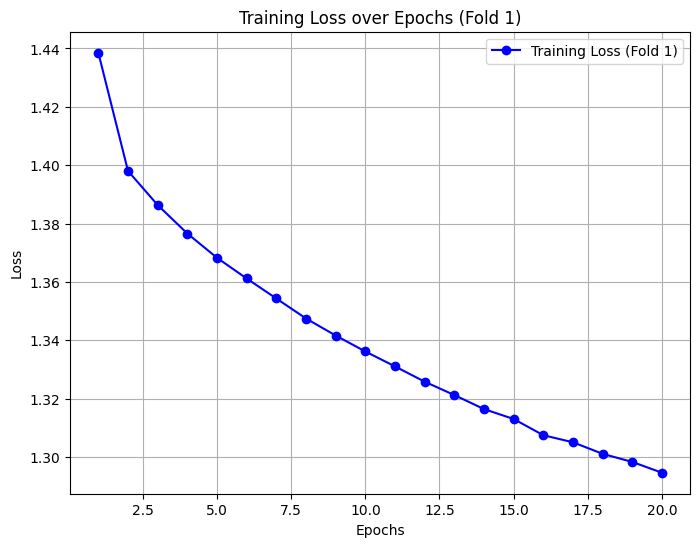

In [27]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming you've already loaded your ImageEncoder model with weights
# image_encoder_model is your pre-trained ViT with the loaded weights

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Preprocessing transformations for ViT model
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Move the image encoder model to the GPU
image_encoder_model = image_encoder_model.cuda()

# Function to process images and extract embeddings using your ViT image encoder
def process_images_with_vit(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image for the ViT model
        image_tensor = preprocess(image).unsqueeze(0).cuda()  # Ensure the image tensor is on the GPU

        with torch.no_grad():
            # Extract image features using your ViT image encoder (which is now on the GPU)
            image_features = image_encoder_model(image_tensor)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()  # Move it back to the CPU for storage
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings


# Process images to get embeddings using ViT image encoder
embeddings = process_images_with_vit(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.0009048016434796221)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_B, all_labels_B = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()

            all_probabilities_B.extend(probabilities)
            all_labels_B.extend(labels.numpy())

    # Evaluate at different thresholds for multi-class classification
    fold_results = []
    for threshold in [0.4, 0.5, 0.65]:
        all_predictions = np.argmax(all_probabilities_B, axis=1)

        accuracy = accuracy_score(all_labels_B, all_predictions)
        precision = precision_score(all_labels_B, all_predictions, average='macro', zero_division=0)
        recall = recall_score(all_labels_B, all_predictions, average='macro', zero_division=0)
        f1 = f1_score(all_labels_B, all_predictions, average='macro', zero_division=0)

        cm = confusion_matrix(all_labels_B, all_predictions)

        fold_results.append({
            'Fold': fold_number,
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

        print(f"\nFold {fold_number} - Threshold = {threshold}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")

    # Store the fold results for each threshold
    all_fold_results.extend(fold_results)
    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


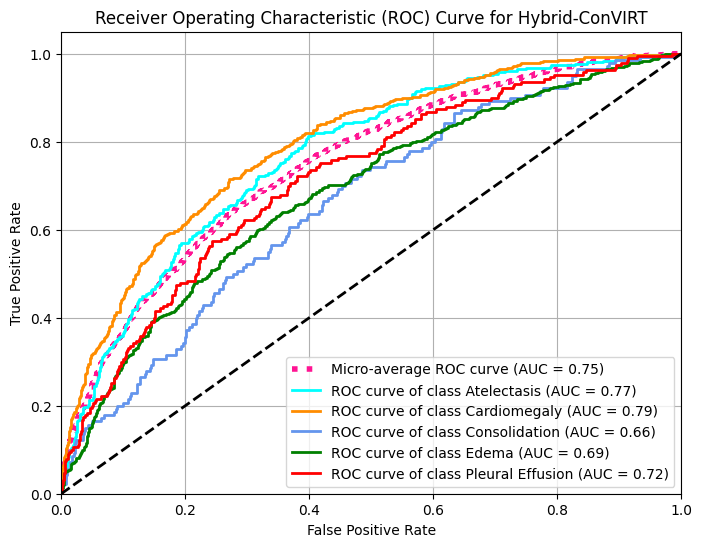

In [32]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_B = np.array(all_probabilities)  # Shape: (N_samples, n_classes)
all_labels_all_folds_B = np.array(all_labels)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized = label_binarize(all_labels_all_folds_B, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized[:, i], all_probabilities_all_folds_B[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized.ravel(), all_probabilities_all_folds_B.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Micro-average Area Under the Curve (AUC): 0.7485


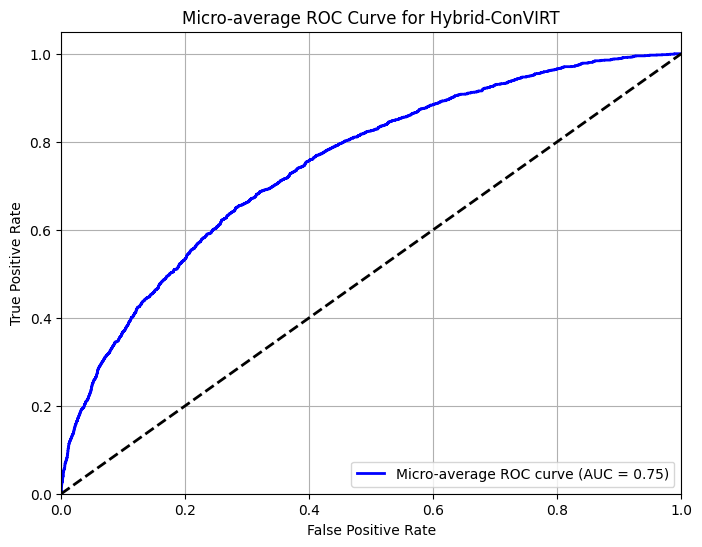

In [33]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_B = np.array(all_probabilities)  # Shape: (N_samples, n_classes)
all_labels_all_folds_B = np.array(all_labels)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = all_probabilities_all_folds_B.shape[1]  # Adjust based on the number of classes
all_labels_binarized = label_binarize(all_labels_all_folds_B, classes=[0, 1, 2, 3, 4])  # Adjust classes for 5 classes

# Compute micro-average ROC curve and ROC area
from sklearn.metrics import roc_curve, auc

# Flatten the arrays for micro-average computation
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized.ravel(), all_probabilities_all_folds_B.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Print the AUC for the micro-average ROC curve
print(f"Micro-average Area Under the Curve (AUC): {roc_auc_micro:.4f}")

# Plot the micro-average ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(fpr_micro, tpr_micro,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})',
         color='blue', linewidth=2)

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Hyperparameter tuning of the linear probe for medCLIP 

In [39]:
df_test =df_data

In [61]:
import optuna

# Function to train and evaluate the model
def objective(trial):
    # Define a search space for learning rate
    lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)

    # Split the data as before (you may modify this based on your dataset)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_number = 1
    input_dim = embedding_array.shape[1]
    loss_values = []
    all_fold_results = []

    # Loop through folds for cross-validation
    for train_index, val_index in kf.split(embedding_array, labels_array):
        X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
        y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

        # Apply SMOTE only to the training fold
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Create Dataset and DataLoader for this fold
        train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
        val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

        train_loader_fold = DataLoader(train_dataset_fold, batch_size=16, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=16, shuffle=False)

        # Initialize the linear probe model
        classifier_model = LinearProbe(input_dim).cuda()

        # Initialize the loss function and optimizer with the trial's learning rate
        criterion = nn.CrossEntropyLoss()  
        optimizer = optim.Adam(classifier_model.parameters(), lr=lr)

        # Training loop
        num_epochs = 20  # Adjust as necessary
        for epoch in range(num_epochs):
            classifier_model.train()
            running_loss = 0.0
            for embeddings, labels in train_loader_fold:
                embeddings, labels = embeddings.cuda(), labels.cuda()

                optimizer.zero_grad()
                outputs = classifier_model(embeddings)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            avg_loss = running_loss / len(train_loader_fold)
            loss_values.append(avg_loss)

            # Early stopping condition
            if avg_loss < 1.13:  # Target loss value
                break

        # Evaluation for this fold
        classifier_model.eval()
        all_probabilities, all_labels = [], []
        with torch.no_grad():
            for embeddings, labels in val_loader_fold:
                embeddings = embeddings.cuda()
                outputs = classifier_model(embeddings)
                probabilities = F.softmax(outputs, dim=1).cpu().numpy()
                all_probabilities.extend(probabilities)
                all_labels.extend(labels.numpy())

        all_predictions = np.argmax(all_probabilities, axis=1)
        accuracy = accuracy_score(all_labels, all_predictions)

        print(f"Fold {fold_number} - Accuracy: {accuracy:.4f}")
        fold_number += 1

    # Return the average loss value across folds to minimize
    return avg_loss

# Step 3: Run the hyperparameter tuning with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Step 4: Get the best parameters and retrain the model
best_lr = study.best_params['learning_rate']
print(f"Best learning rate: {best_lr}")

# Retrain the model using the best learning rate


[I 2024-10-16 20:05:19,199] A new study created in memory with name: no-name-988d18e0-d83f-4cfb-870f-5de2652907ce
/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5471
Fold 2 - Accuracy: 0.5396
Fold 3 - Accuracy: 0.5420
Fold 4 - Accuracy: 0.5425


[I 2024-10-16 20:07:46,662] Trial 0 finished with value: 1.2076961754708178 and parameters: {'learning_rate': 5.899513620462992e-06}. Best is trial 0 with value: 1.2076961754708178.


Fold 5 - Accuracy: 0.5522


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5299
Fold 2 - Accuracy: 0.5417
Fold 3 - Accuracy: 0.5361
Fold 4 - Accuracy: 0.5484


[I 2024-10-16 20:10:13,837] Trial 1 finished with value: 1.2013903028227957 and parameters: {'learning_rate': 6.256642017217402e-06}. Best is trial 1 with value: 1.2013903028227957.


Fold 5 - Accuracy: 0.5570


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5588
Fold 2 - Accuracy: 0.5433
Fold 3 - Accuracy: 0.5120
Fold 4 - Accuracy: 0.5490


[I 2024-10-16 20:12:41,263] Trial 2 finished with value: 1.1347393540476678 and parameters: {'learning_rate': 0.000127314913329148}. Best is trial 2 with value: 1.1347393540476678.


Fold 5 - Accuracy: 0.5634


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5631
Fold 2 - Accuracy: 0.5540
Fold 3 - Accuracy: 0.5548
Fold 4 - Accuracy: 0.5597


[I 2024-10-16 20:15:10,292] Trial 3 finished with value: 1.1356417889589063 and parameters: {'learning_rate': 0.00010306005009063821}. Best is trial 2 with value: 1.1347393540476678.


Fold 5 - Accuracy: 0.5441


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4481
Fold 2 - Accuracy: 0.4390
Fold 3 - Accuracy: 0.3954
Fold 4 - Accuracy: 0.2868


[I 2024-10-16 20:17:39,982] Trial 4 finished with value: 2.503900781031395 and parameters: {'learning_rate': 0.022524807612989535}. Best is trial 2 with value: 1.1347393540476678.


Fold 5 - Accuracy: 0.5811


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5540
Fold 2 - Accuracy: 0.5711
Fold 3 - Accuracy: 0.4291
Fold 4 - Accuracy: 0.4457


[I 2024-10-16 20:20:08,147] Trial 5 finished with value: 1.1956429021603174 and parameters: {'learning_rate': 0.003126370601645935}. Best is trial 2 with value: 1.1347393540476678.


Fold 5 - Accuracy: 0.4537


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5267
Fold 2 - Accuracy: 0.4770
Fold 3 - Accuracy: 0.4270
Fold 4 - Accuracy: 0.4938


[I 2024-10-16 20:22:37,580] Trial 6 finished with value: 1.4772038209125007 and parameters: {'learning_rate': 0.007241919848906346}. Best is trial 2 with value: 1.1347393540476678.


Fold 5 - Accuracy: 0.5581


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5599
Fold 2 - Accuracy: 0.5048
Fold 3 - Accuracy: 0.5623
Fold 4 - Accuracy: 0.5302


[I 2024-10-16 20:24:32,242] Trial 7 finished with value: 1.126478978555104 and parameters: {'learning_rate': 0.0003995361699811742}. Best is trial 7 with value: 1.126478978555104.


Fold 5 - Accuracy: 0.5976


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5112
Fold 2 - Accuracy: 0.4733
Fold 3 - Accuracy: 0.4489
Fold 4 - Accuracy: 0.4912


[I 2024-10-16 20:27:01,831] Trial 8 finished with value: 1.4198103091296028 and parameters: {'learning_rate': 1.0763155883045782e-06}. Best is trial 7 with value: 1.126478978555104.


Fold 5 - Accuracy: 0.5045


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4070
Fold 2 - Accuracy: 0.5251
Fold 3 - Accuracy: 0.4607
Fold 4 - Accuracy: 0.5736


[I 2024-10-16 20:29:25,826] Trial 9 finished with value: 1.1511186175561219 and parameters: {'learning_rate': 0.0015394776339088731}. Best is trial 7 with value: 1.126478978555104.


Fold 5 - Accuracy: 0.5292


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4294
Fold 2 - Accuracy: 0.4091
Fold 3 - Accuracy: 0.4157
Fold 4 - Accuracy: 0.5297


[I 2024-10-16 20:31:55,038] Trial 10 finished with value: 10.755327251661704 and parameters: {'learning_rate': 0.09318914093484998}. Best is trial 7 with value: 1.126478978555104.


Fold 5 - Accuracy: 0.4553


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5294
Fold 2 - Accuracy: 0.5166
Fold 3 - Accuracy: 0.5506
Fold 4 - Accuracy: 0.5650


[I 2024-10-16 20:34:12,968] Trial 11 finished with value: 1.1271882157898665 and parameters: {'learning_rate': 0.00017161166124742558}. Best is trial 7 with value: 1.126478978555104.


Fold 5 - Accuracy: 0.5778


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5513
Fold 2 - Accuracy: 0.5690
Fold 3 - Accuracy: 0.5484
Fold 4 - Accuracy: 0.5543


[I 2024-10-16 20:36:06,416] Trial 12 finished with value: 1.1253940274330492 and parameters: {'learning_rate': 0.00035299464226977537}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5795


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5684
Fold 2 - Accuracy: 0.5316
Fold 3 - Accuracy: 0.4660
Fold 4 - Accuracy: 0.4944


[I 2024-10-16 20:37:54,702] Trial 13 finished with value: 1.1290015684946606 and parameters: {'learning_rate': 0.0005848283044542552}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5532


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5561
Fold 2 - Accuracy: 0.5487
Fold 3 - Accuracy: 0.5618
Fold 4 - Accuracy: 0.5666


[I 2024-10-16 20:40:23,890] Trial 14 finished with value: 1.1520025328790142 and parameters: {'learning_rate': 3.837295353731136e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5725


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5754
Fold 2 - Accuracy: 0.5412
Fold 3 - Accuracy: 0.4971
Fold 4 - Accuracy: 0.5463


[I 2024-10-16 20:42:16,645] Trial 15 finished with value: 1.1291336256810214 and parameters: {'learning_rate': 0.0007272942314100751}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5816


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5540
Fold 2 - Accuracy: 0.5487
Fold 3 - Accuracy: 0.5468
Fold 4 - Accuracy: 0.5629


[I 2024-10-16 20:44:44,346] Trial 16 finished with value: 1.1572779247698108 and parameters: {'learning_rate': 2.7888002297339244e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5650


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5102
Fold 2 - Accuracy: 0.4070
Fold 3 - Accuracy: 0.4163
Fold 4 - Accuracy: 0.5704


[I 2024-10-16 20:47:12,728] Trial 17 finished with value: 1.4703178355780353 and parameters: {'learning_rate': 0.007939427631969169}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.4601


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5690
Fold 2 - Accuracy: 0.4647
Fold 3 - Accuracy: 0.5350
Fold 4 - Accuracy: 0.5736


[I 2024-10-16 20:49:00,053] Trial 18 finished with value: 1.1276550700279588 and parameters: {'learning_rate': 0.0005234370605386046}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5827


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5481
Fold 2 - Accuracy: 0.5535
Fold 3 - Accuracy: 0.5623
Fold 4 - Accuracy: 0.5597


[I 2024-10-16 20:51:27,570] Trial 19 finished with value: 1.1517336326785321 and parameters: {'learning_rate': 4.1357258094111144e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5570


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4791
Fold 2 - Accuracy: 0.4684
Fold 3 - Accuracy: 0.4601
Fold 4 - Accuracy: 0.5843


[I 2024-10-16 20:53:56,300] Trial 20 finished with value: 1.1668389154427938 and parameters: {'learning_rate': 0.0022651452692947745}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.4922


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5444
Fold 2 - Accuracy: 0.5342
Fold 3 - Accuracy: 0.5276
Fold 4 - Accuracy: 0.5591


[I 2024-10-16 20:56:12,014] Trial 21 finished with value: 1.1298995610321867 and parameters: {'learning_rate': 0.00018779987179210421}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5778


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5369
Fold 2 - Accuracy: 0.5321
Fold 3 - Accuracy: 0.5506
Fold 4 - Accuracy: 0.5484


[I 2024-10-16 20:58:10,528] Trial 22 finished with value: 1.1297330293846368 and parameters: {'learning_rate': 0.00026800163344308203}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5682


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5545
Fold 2 - Accuracy: 0.5444
Fold 3 - Accuracy: 0.5281
Fold 4 - Accuracy: 0.5554


[I 2024-10-16 21:00:39,131] Trial 23 finished with value: 1.1389211078310788 and parameters: {'learning_rate': 9.948701852407106e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5752


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5428
Fold 2 - Accuracy: 0.5433
Fold 3 - Accuracy: 0.5522
Fold 4 - Accuracy: 0.5484


[I 2024-10-16 21:03:07,417] Trial 24 finished with value: 1.1683240350853368 and parameters: {'learning_rate': 1.7180473049809548e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5581


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5519
Fold 2 - Accuracy: 0.5332
Fold 3 - Accuracy: 0.5618
Fold 4 - Accuracy: 0.5516


[I 2024-10-16 21:05:25,232] Trial 25 finished with value: 1.1280379021197595 and parameters: {'learning_rate': 0.0013637588488747635}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5623


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5786
Fold 2 - Accuracy: 0.5444
Fold 3 - Accuracy: 0.5484
Fold 4 - Accuracy: 0.5837


[I 2024-10-16 21:07:19,601] Trial 26 finished with value: 1.1279296778021228 and parameters: {'learning_rate': 0.0003253072725934236}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5741


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4877
Fold 2 - Accuracy: 0.4209
Fold 3 - Accuracy: 0.4831
Fold 4 - Accuracy: 0.3981


[I 2024-10-16 21:09:47,689] Trial 27 finished with value: 1.310940797322981 and parameters: {'learning_rate': 0.005320672879303232}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.4462


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5615
Fold 2 - Accuracy: 0.5455
Fold 3 - Accuracy: 0.5602
Fold 4 - Accuracy: 0.5607


[I 2024-10-16 21:12:16,319] Trial 28 finished with value: 1.138789119872641 and parameters: {'learning_rate': 8.680148909135846e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5474


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5524
Fold 2 - Accuracy: 0.5503
Fold 3 - Accuracy: 0.5377
Fold 4 - Accuracy: 0.5474


[I 2024-10-16 21:14:45,812] Trial 29 finished with value: 1.167163439029746 and parameters: {'learning_rate': 1.7560255491246447e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5575


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5733
Fold 2 - Accuracy: 0.5348
Fold 3 - Accuracy: 0.5479
Fold 4 - Accuracy: 0.4617


[I 2024-10-16 21:16:37,159] Trial 30 finished with value: 1.1298531421433402 and parameters: {'learning_rate': 0.0008366690854093483}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5538


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5850
Fold 2 - Accuracy: 0.5567
Fold 3 - Accuracy: 0.5211
Fold 4 - Accuracy: 0.5704


[I 2024-10-16 21:18:27,015] Trial 31 finished with value: 1.1275999745976493 and parameters: {'learning_rate': 0.00042000306436401456}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5714


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5187
Fold 2 - Accuracy: 0.5508
Fold 3 - Accuracy: 0.5313
Fold 4 - Accuracy: 0.5688


[I 2024-10-16 21:20:31,313] Trial 32 finished with value: 1.1291819091732422 and parameters: {'learning_rate': 0.0002607938646767486}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5522


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5460
Fold 2 - Accuracy: 0.5422
Fold 3 - Accuracy: 0.5372
Fold 4 - Accuracy: 0.5383


[I 2024-10-16 21:22:58,964] Trial 33 finished with value: 1.20902547340966 and parameters: {'learning_rate': 6.076701075471291e-06}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5468


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5594
Fold 2 - Accuracy: 0.5283
Fold 3 - Accuracy: 0.5393
Fold 4 - Accuracy: 0.5746


[I 2024-10-16 21:25:28,894] Trial 34 finished with value: 1.1453259491801113 and parameters: {'learning_rate': 5.9697118439683606e-05}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5655


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5529
Fold 2 - Accuracy: 0.5321
Fold 3 - Accuracy: 0.5602
Fold 4 - Accuracy: 0.5468


[I 2024-10-16 21:27:52,072] Trial 35 finished with value: 1.1317025239536251 and parameters: {'learning_rate': 0.00016291573340600595}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5661


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5503
Fold 2 - Accuracy: 0.5658
Fold 3 - Accuracy: 0.5318
Fold 4 - Accuracy: 0.5495


[I 2024-10-16 21:29:39,496] Trial 36 finished with value: 1.1272718115652607 and parameters: {'learning_rate': 0.00045751628040538835}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5639


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5278
Fold 2 - Accuracy: 0.5476
Fold 3 - Accuracy: 0.5522
Fold 4 - Accuracy: 0.5484


[I 2024-10-16 21:31:35,189] Trial 37 finished with value: 1.1268883597418125 and parameters: {'learning_rate': 0.0009209003785844041}. Best is trial 12 with value: 1.1253940274330492.


Fold 5 - Accuracy: 0.5463


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4503
Fold 2 - Accuracy: 0.5374
Fold 3 - Accuracy: 0.4751
Fold 4 - Accuracy: 0.5329


[I 2024-10-16 21:33:45,425] Trial 38 finished with value: 1.1236724872351886 and parameters: {'learning_rate': 0.001166731226323477}. Best is trial 38 with value: 1.1236724872351886.


Fold 5 - Accuracy: 0.5393


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5064
Fold 2 - Accuracy: 0.5668
Fold 3 - Accuracy: 0.3692
Fold 4 - Accuracy: 0.4018


[I 2024-10-16 21:36:15,074] Trial 39 finished with value: 2.244243014230858 and parameters: {'learning_rate': 0.0181757903592825}. Best is trial 38 with value: 1.1236724872351886.


Fold 5 - Accuracy: 0.3034


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4717
Fold 2 - Accuracy: 0.5225
Fold 3 - Accuracy: 0.5682
Fold 4 - Accuracy: 0.5564


[I 2024-10-16 21:38:44,618] Trial 40 finished with value: 1.1553939091174563 and parameters: {'learning_rate': 0.00233086573990996}. Best is trial 38 with value: 1.1236724872351886.


Fold 5 - Accuracy: 0.5372


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4840
Fold 2 - Accuracy: 0.5278
Fold 3 - Accuracy: 0.5554
Fold 4 - Accuracy: 0.5581


[I 2024-10-16 21:40:54,385] Trial 41 finished with value: 1.120722872966222 and parameters: {'learning_rate': 0.0011737516677540077}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5671


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5476
Fold 2 - Accuracy: 0.5503
Fold 3 - Accuracy: 0.4735
Fold 4 - Accuracy: 0.5902


[I 2024-10-16 21:43:03,025] Trial 42 finished with value: 1.1270127367316856 and parameters: {'learning_rate': 0.0010830603309697926}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5115


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4631
Fold 2 - Accuracy: 0.4524
Fold 3 - Accuracy: 0.5420
Fold 4 - Accuracy: 0.4981


[I 2024-10-16 21:45:32,849] Trial 43 finished with value: 1.2759862157221282 and parameters: {'learning_rate': 0.004481877972866827}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5318


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5813
Fold 2 - Accuracy: 0.5171
Fold 3 - Accuracy: 0.4773
Fold 4 - Accuracy: 0.5538


[I 2024-10-16 21:47:59,885] Trial 44 finished with value: 1.1399311457990258 and parameters: {'learning_rate': 0.0016064974579692516}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5436


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4893
Fold 2 - Accuracy: 0.5016
Fold 3 - Accuracy: 0.5329
Fold 4 - Accuracy: 0.5532


[I 2024-10-16 21:50:01,764] Trial 45 finished with value: 1.1256176559289495 and parameters: {'learning_rate': 0.0009303127949871506}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5661


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5326
Fold 2 - Accuracy: 0.3460
Fold 3 - Accuracy: 0.3826
Fold 4 - Accuracy: 0.5597


[I 2024-10-16 21:52:31,413] Trial 46 finished with value: 1.5653571363291394 and parameters: {'learning_rate': 0.009120737703601207}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.4248


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5545
Fold 2 - Accuracy: 0.5032
Fold 3 - Accuracy: 0.4617
Fold 4 - Accuracy: 0.4682


[I 2024-10-16 21:55:01,084] Trial 47 finished with value: 1.2189560660134269 and parameters: {'learning_rate': 0.00338831255438216}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.4436


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5123
Fold 2 - Accuracy: 0.5070
Fold 3 - Accuracy: 0.4965
Fold 4 - Accuracy: 0.5393


[I 2024-10-16 21:57:29,778] Trial 48 finished with value: 1.3816645666117662 and parameters: {'learning_rate': 1.6211729601017674e-06}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5195


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4497
Fold 2 - Accuracy: 0.4503
Fold 3 - Accuracy: 0.3226
Fold 4 - Accuracy: 0.5045


[I 2024-10-16 22:00:00,026] Trial 49 finished with value: 1.8921644536962496 and parameters: {'learning_rate': 0.013883534220275244}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.3360


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5053
Fold 2 - Accuracy: 0.5433
Fold 3 - Accuracy: 0.5217
Fold 4 - Accuracy: 0.4569


[I 2024-10-16 22:02:29,113] Trial 50 finished with value: 1.1395422072150978 and parameters: {'learning_rate': 0.0015831618849422994}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.4815


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5332
Fold 2 - Accuracy: 0.5406
Fold 3 - Accuracy: 0.5431
Fold 4 - Accuracy: 0.4580


[I 2024-10-16 22:04:22,639] Trial 51 finished with value: 1.1232774632147167 and parameters: {'learning_rate': 0.0007675832527746816}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5527


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5283
Fold 2 - Accuracy: 0.5166
Fold 3 - Accuracy: 0.5222
Fold 4 - Accuracy: 0.5795


[I 2024-10-16 22:06:11,057] Trial 52 finished with value: 1.1293414336569765 and parameters: {'learning_rate': 0.0006923781860644067}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5490


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5219
Fold 2 - Accuracy: 0.5193
Fold 3 - Accuracy: 0.5195
Fold 4 - Accuracy: 0.4468


[I 2024-10-16 22:08:39,892] Trial 53 finished with value: 1.1548828041747454 and parameters: {'learning_rate': 0.002129867430493851}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5388


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5326
Fold 2 - Accuracy: 0.5471
Fold 3 - Accuracy: 0.5784
Fold 4 - Accuracy: 0.5591


[I 2024-10-16 22:10:33,895] Trial 54 finished with value: 1.128980434134845 and parameters: {'learning_rate': 0.00033812580970827156}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5677


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5385
Fold 2 - Accuracy: 0.5096
Fold 3 - Accuracy: 0.4960
Fold 4 - Accuracy: 0.5757


[I 2024-10-16 22:12:22,463] Trial 55 finished with value: 1.1265114982972604 and parameters: {'learning_rate': 0.0006225381018731057}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5564


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5658
Fold 2 - Accuracy: 0.5342
Fold 3 - Accuracy: 0.5318
Fold 4 - Accuracy: 0.5645


[I 2024-10-16 22:14:49,333] Trial 56 finished with value: 1.1329974210978448 and parameters: {'learning_rate': 0.00013475977782763943}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5538


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5182
Fold 2 - Accuracy: 0.5508
Fold 3 - Accuracy: 0.5259
Fold 4 - Accuracy: 0.5800


[I 2024-10-16 22:16:53,184] Trial 57 finished with value: 1.1284244093712936 and parameters: {'learning_rate': 0.00024201381383319597}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5522


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5016
Fold 2 - Accuracy: 0.5225
Fold 3 - Accuracy: 0.4671
Fold 4 - Accuracy: 0.5484


[I 2024-10-16 22:19:08,083] Trial 58 finished with value: 1.130322106117301 and parameters: {'learning_rate': 0.001196515239797663}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5629


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4727
Fold 2 - Accuracy: 0.5551
Fold 3 - Accuracy: 0.4339
Fold 4 - Accuracy: 0.5564


[I 2024-10-16 22:21:37,836] Trial 59 finished with value: 1.2503407008955267 and parameters: {'learning_rate': 0.0038288573482622465}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5083


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5128
Fold 2 - Accuracy: 0.4465
Fold 3 - Accuracy: 0.4114
Fold 4 - Accuracy: 0.4345


[I 2024-10-16 22:24:06,968] Trial 60 finished with value: 9.74121740050101 and parameters: {'learning_rate': 0.08437430924849698}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.4607


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5225
Fold 2 - Accuracy: 0.5519
Fold 3 - Accuracy: 0.5099
Fold 4 - Accuracy: 0.5543


[I 2024-10-16 22:25:54,910] Trial 61 finished with value: 1.1261995081161527 and parameters: {'learning_rate': 0.0005316528779605088}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5811


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5358
Fold 2 - Accuracy: 0.5278
Fold 3 - Accuracy: 0.5158
Fold 4 - Accuracy: 0.5682


[I 2024-10-16 22:27:42,999] Trial 62 finished with value: 1.1247558481105426 and parameters: {'learning_rate': 0.00045616383559430115}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5543


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5321
Fold 2 - Accuracy: 0.5321
Fold 3 - Accuracy: 0.5286
Fold 4 - Accuracy: 0.5880


[I 2024-10-16 22:29:33,789] Trial 63 finished with value: 1.1221715142491164 and parameters: {'learning_rate': 0.0005405942802996098}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5709


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5299
Fold 2 - Accuracy: 0.5353
Fold 3 - Accuracy: 0.5495
Fold 4 - Accuracy: 0.5634


[I 2024-10-16 22:31:35,781] Trial 64 finished with value: 1.1296090721636451 and parameters: {'learning_rate': 0.0008717717604812729}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5500


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4695
Fold 2 - Accuracy: 0.5219
Fold 3 - Accuracy: 0.4612
Fold 4 - Accuracy: 0.4596


[I 2024-10-16 22:34:05,715] Trial 65 finished with value: 1.2110173138644131 and parameters: {'learning_rate': 0.002693593474608386}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.4387


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4840
Fold 2 - Accuracy: 0.4807
Fold 3 - Accuracy: 0.5543
Fold 4 - Accuracy: 0.5495


[I 2024-10-16 22:36:33,970] Trial 66 finished with value: 1.1389075738467622 and parameters: {'learning_rate': 0.0017701956947179607}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5292


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5620
Fold 2 - Accuracy: 0.5374
Fold 3 - Accuracy: 0.5452
Fold 4 - Accuracy: 0.5532


[I 2024-10-16 22:38:42,006] Trial 67 finished with value: 1.127472235801372 and parameters: {'learning_rate': 0.0002319080960513327}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5564


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5246
Fold 2 - Accuracy: 0.5578
Fold 3 - Accuracy: 0.5120
Fold 4 - Accuracy: 0.5324


[I 2024-10-16 22:40:35,162] Trial 68 finished with value: 1.1292508981553127 and parameters: {'learning_rate': 0.000373583162424113}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5527


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5647
Fold 2 - Accuracy: 0.5369
Fold 3 - Accuracy: 0.5586
Fold 4 - Accuracy: 0.5837


[I 2024-10-16 22:43:02,562] Trial 69 finished with value: 1.1375265901020084 and parameters: {'learning_rate': 9.365058585122211e-05}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5827


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5588
Fold 2 - Accuracy: 0.5433
Fold 3 - Accuracy: 0.5516
Fold 4 - Accuracy: 0.5276


[I 2024-10-16 22:45:06,673] Trial 70 finished with value: 1.129612755268178 and parameters: {'learning_rate': 0.0011169026725513151}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5902


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5150
Fold 2 - Accuracy: 0.5176
Fold 3 - Accuracy: 0.5094
Fold 4 - Accuracy: 0.5682


[I 2024-10-16 22:46:51,640] Trial 71 finished with value: 1.1279951535603578 and parameters: {'learning_rate': 0.0006617357788796852}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.4960


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5529
Fold 2 - Accuracy: 0.5802
Fold 3 - Accuracy: 0.5377
Fold 4 - Accuracy: 0.5730


[I 2024-10-16 22:48:42,657] Trial 72 finished with value: 1.1221166633172088 and parameters: {'learning_rate': 0.0005174507109963264}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5527


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5636
Fold 2 - Accuracy: 0.5401
Fold 3 - Accuracy: 0.5367
Fold 4 - Accuracy: 0.5720


[I 2024-10-16 22:50:30,323] Trial 73 finished with value: 1.1263150703698135 and parameters: {'learning_rate': 0.0004655712586809007}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5720


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5225
Fold 2 - Accuracy: 0.5545
Fold 3 - Accuracy: 0.5281
Fold 4 - Accuracy: 0.5864


[I 2024-10-16 22:52:22,526] Trial 74 finished with value: 1.1265500107679856 and parameters: {'learning_rate': 0.0003273088922780402}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5655


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5417
Fold 2 - Accuracy: 0.5647
Fold 3 - Accuracy: 0.5393
Fold 4 - Accuracy: 0.5725


[I 2024-10-16 22:54:42,915] Trial 75 finished with value: 1.1303577498440749 and parameters: {'learning_rate': 0.00017754415524229219}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5629


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5545
Fold 2 - Accuracy: 0.5396
Fold 3 - Accuracy: 0.4928
Fold 4 - Accuracy: 0.5714


[I 2024-10-16 22:56:36,668] Trial 76 finished with value: 1.127486254679545 and parameters: {'learning_rate': 0.0008621657434640198}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5447


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4588
Fold 2 - Accuracy: 0.5401
Fold 3 - Accuracy: 0.5350
Fold 4 - Accuracy: 0.5447


[I 2024-10-16 22:58:52,899] Trial 77 finished with value: 1.1292259252265338 and parameters: {'learning_rate': 0.0012618770979754322}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5698


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5636
Fold 2 - Accuracy: 0.5134
Fold 3 - Accuracy: 0.5484
Fold 4 - Accuracy: 0.5532


[I 2024-10-16 23:00:39,229] Trial 78 finished with value: 1.1284539809215053 and parameters: {'learning_rate': 0.0005467702171524465}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5564


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5658
Fold 2 - Accuracy: 0.5529
Fold 3 - Accuracy: 0.5088
Fold 4 - Accuracy: 0.5736


[I 2024-10-16 23:03:05,183] Trial 79 finished with value: 1.1303119056663467 and parameters: {'learning_rate': 0.00013684882678928297}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5431


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5594
Fold 2 - Accuracy: 0.5535
Fold 3 - Accuracy: 0.5388
Fold 4 - Accuracy: 0.5522


[I 2024-10-16 23:05:34,471] Trial 80 finished with value: 1.1446449411228692 and parameters: {'learning_rate': 7.112705282142476e-05}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.5666


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5262
Fold 2 - Accuracy: 0.5267
Fold 3 - Accuracy: 0.5602
Fold 4 - Accuracy: 0.5618


[I 2024-10-16 23:07:18,649] Trial 81 finished with value: 1.1293789685443882 and parameters: {'learning_rate': 0.000492173156791717}. Best is trial 41 with value: 1.120722872966222.


Fold 5 - Accuracy: 0.4997


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5310
Fold 2 - Accuracy: 0.5219
Fold 3 - Accuracy: 0.5484
Fold 4 - Accuracy: 0.5730


[I 2024-10-16 23:09:08,056] Trial 82 finished with value: 1.1205388192688868 and parameters: {'learning_rate': 0.0007364208990782611}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5602


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5182
Fold 2 - Accuracy: 0.5733
Fold 3 - Accuracy: 0.4698
Fold 4 - Accuracy: 0.5714


[I 2024-10-16 23:11:38,122] Trial 83 finished with value: 1.1520704742665584 and parameters: {'learning_rate': 0.0019517018017800038}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5795


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5326
Fold 2 - Accuracy: 0.5075
Fold 3 - Accuracy: 0.4987
Fold 4 - Accuracy: 0.4767


[I 2024-10-16 23:13:25,494] Trial 84 finished with value: 1.1211604872842007 and parameters: {'learning_rate': 0.0007408900026763822}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5452


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5358
Fold 2 - Accuracy: 0.5203
Fold 3 - Accuracy: 0.5292
Fold 4 - Accuracy: 0.5564


[I 2024-10-16 23:15:26,995] Trial 85 finished with value: 1.1246569980966283 and parameters: {'learning_rate': 0.00027749635195199225}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5661


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5235
Fold 2 - Accuracy: 0.5348
Fold 3 - Accuracy: 0.5104
Fold 4 - Accuracy: 0.5778


[I 2024-10-16 23:17:37,336] Trial 86 finished with value: 1.1288619973931056 and parameters: {'learning_rate': 0.00021652858392656523}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5768


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5299
Fold 2 - Accuracy: 0.5032
Fold 3 - Accuracy: 0.5292
Fold 4 - Accuracy: 0.5425


[I 2024-10-16 23:19:23,973] Trial 87 finished with value: 1.1273468836526548 and parameters: {'learning_rate': 0.0007644258975728295}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5880


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5545
Fold 2 - Accuracy: 0.5332
Fold 3 - Accuracy: 0.5736
Fold 4 - Accuracy: 0.5789


[I 2024-10-16 23:21:23,847] Trial 88 finished with value: 1.1257486284450535 and parameters: {'learning_rate': 0.00028690768947509153}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5698


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5176
Fold 2 - Accuracy: 0.4717
Fold 3 - Accuracy: 0.4874
Fold 4 - Accuracy: 0.4232


[I 2024-10-16 23:23:52,968] Trial 89 finished with value: 1.3523534828416994 and parameters: {'learning_rate': 0.005549927995197755}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.4805


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5717
Fold 2 - Accuracy: 0.5016
Fold 3 - Accuracy: 0.5227
Fold 4 - Accuracy: 0.5377


[I 2024-10-16 23:26:21,354] Trial 90 finished with value: 1.1894504962785073 and parameters: {'learning_rate': 0.0027804779756063908}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.4441


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5214
Fold 2 - Accuracy: 0.5251
Fold 3 - Accuracy: 0.5227
Fold 4 - Accuracy: 0.5581


[I 2024-10-16 23:28:14,118] Trial 91 finished with value: 1.1259556948318052 and parameters: {'learning_rate': 0.0003962743407717248}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5361


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5406
Fold 2 - Accuracy: 0.5428
Fold 3 - Accuracy: 0.5634
Fold 4 - Accuracy: 0.4757


[I 2024-10-16 23:30:18,969] Trial 92 finished with value: 1.1280433068585785 and parameters: {'learning_rate': 0.0011041173150119145}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5072


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5663
Fold 2 - Accuracy: 0.5150
Fold 3 - Accuracy: 0.5613
Fold 4 - Accuracy: 0.5276


[I 2024-10-16 23:32:10,756] Trial 93 finished with value: 1.1281489913767957 and parameters: {'learning_rate': 0.000617769710396438}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5484


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5615
Fold 2 - Accuracy: 0.5588
Fold 3 - Accuracy: 0.5490
Fold 4 - Accuracy: 0.5762


[I 2024-10-16 23:34:39,405] Trial 94 finished with value: 1.1437102800913537 and parameters: {'learning_rate': 0.0014529856920374477}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5944


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5406
Fold 2 - Accuracy: 0.5193
Fold 3 - Accuracy: 0.5511
Fold 4 - Accuracy: 0.5655


[I 2024-10-16 23:36:30,577] Trial 95 finished with value: 1.1290492859292538 and parameters: {'learning_rate': 0.00038981810328123426}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5784


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5797
Fold 2 - Accuracy: 0.5561
Fold 3 - Accuracy: 0.5431
Fold 4 - Accuracy: 0.5688


[I 2024-10-16 23:38:42,934] Trial 96 finished with value: 1.127005657057589 and parameters: {'learning_rate': 0.00019625937713708359}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5698


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5524
Fold 2 - Accuracy: 0.5578
Fold 3 - Accuracy: 0.5201
Fold 4 - Accuracy: 0.5457


[I 2024-10-16 23:40:34,066] Trial 97 finished with value: 1.1268853146083961 and parameters: {'learning_rate': 0.0007443150496768337}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5869


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.5374
Fold 2 - Accuracy: 0.5396
Fold 3 - Accuracy: 0.5474
Fold 4 - Accuracy: 0.5629


[I 2024-10-16 23:42:28,710] Trial 98 finished with value: 1.1255007192343287 and parameters: {'learning_rate': 0.00028411173503625086}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.5538


/tmp/ipykernel_259431/1755553081.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4807
Fold 2 - Accuracy: 0.5358
Fold 3 - Accuracy: 0.4468
Fold 4 - Accuracy: 0.4981


[I 2024-10-16 23:44:30,841] Trial 99 finished with value: 1.1264070571587887 and parameters: {'learning_rate': 0.0010241270321073024}. Best is trial 82 with value: 1.1205388192688868.


Fold 5 - Accuracy: 0.4596
Best learning rate: 0.0007364208990782611


## hybrid hyperparameter

In [34]:
import optuna
from torch.optim import Adam

# Define the objective function for hyperparameter tuning
def objective(trial):
    # Suggest learning rate and batch size using Optuna's search space
    lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)
    batch_size = trial.suggest_int('batch_size', 16, 64)  # Tune batch size between 16 and 64
    
    # Initialize 5-fold cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_number = 1
    input_dim = embedding_array.shape[1]
    loss_values = []
    all_fold_results = []

    # Loop through folds for cross-validation
    for train_index, val_index in kf.split(embedding_array, labels_array):
        X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
        y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

        # Apply SMOTE only to the training fold
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Create Dataset and DataLoader for this fold
        train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
        val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Initialize the linear probe model
        classifier_model = LinearProbe(input_dim).cuda()

        # Initialize the loss function and optimizer with the trial's suggested learning rate
        criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
        optimizer = Adam(classifier_model.parameters(), lr=lr)

        # Training loop for each fold
        num_epochs = 20  # Adjust as necessary
        for epoch in range(num_epochs):
            classifier_model.train()
            running_loss = 0.0
            for embeddings, labels in train_loader_fold:
                embeddings, labels = embeddings.cuda(), labels.cuda()

                optimizer.zero_grad()
                outputs = classifier_model(embeddings)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            avg_loss = running_loss / len(train_loader_fold)
            loss_values.append(avg_loss)

            # Early stopping condition (optional)
            if avg_loss < 1.13:  # Adjust target loss value as needed
                break

        # Evaluation for this fold
        classifier_model.eval()
        all_probabilities, all_labels = [], []
        with torch.no_grad():
            for embeddings, labels in val_loader_fold:
                embeddings = embeddings.cuda()
                outputs = classifier_model(embeddings)
                probabilities = F.softmax(outputs, dim=1).cpu().numpy()
                all_probabilities.extend(probabilities)
                all_labels.extend(labels.numpy())

        all_predictions = np.argmax(all_probabilities, axis=1)
        accuracy = accuracy_score(all_labels, all_predictions)

        print(f"Fold {fold_number} - Accuracy: {accuracy:.4f}")
        fold_number += 1

    # Return the average loss value across folds to minimize
    return avg_loss

# Step 3: Run the hyperparameter tuning with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=40)  # Adjust the number of trials based on your preference

# Step 4: Get the best parameters from Optuna
best_lr = study.best_params['learning_rate']
best_batch_size = study.best_params['batch_size']
print(f"Best learning rate: {best_lr}, Best batch size: {best_batch_size}")

# Retrain the model using the best learning rate and batch size (optional)


[I 2024-10-17 18:46:56,767] A new study created in memory with name: no-name-ca56523f-4b2f-48f4-ab00-c2ff871fb237
/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4433
Fold 2 - Accuracy: 0.4107
Fold 3 - Accuracy: 0.4350
Fold 4 - Accuracy: 0.4152


[I 2024-10-17 18:48:15,322] Trial 0 finished with value: 1.212571468618181 and parameters: {'learning_rate': 0.0045968236476618025, 'batch_size': 49}. Best is trial 0 with value: 1.212571468618181.


Fold 5 - Accuracy: 0.4537


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4246
Fold 2 - Accuracy: 0.4171
Fold 3 - Accuracy: 0.4398
Fold 4 - Accuracy: 0.4275


[I 2024-10-17 18:49:37,420] Trial 1 finished with value: 1.2458352694209194 and parameters: {'learning_rate': 0.0023471826186466753, 'batch_size': 45}. Best is trial 0 with value: 1.212571468618181.


Fold 5 - Accuracy: 0.4339


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3925
Fold 2 - Accuracy: 0.3583
Fold 3 - Accuracy: 0.4040
Fold 4 - Accuracy: 0.3751


[I 2024-10-17 18:51:02,459] Trial 2 finished with value: 1.5186620015650987 and parameters: {'learning_rate': 4.292418400335179e-06, 'batch_size': 40}. Best is trial 0 with value: 1.212571468618181.


Fold 5 - Accuracy: 0.4045


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3556
Fold 2 - Accuracy: 0.3701
Fold 3 - Accuracy: 0.3804
Fold 4 - Accuracy: 0.3499


[I 2024-10-17 18:52:28,442] Trial 3 finished with value: 1.553042695298791 and parameters: {'learning_rate': 2.2001739295767103e-06, 'batch_size': 40}. Best is trial 0 with value: 1.212571468618181.


Fold 5 - Accuracy: 0.3911


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4037
Fold 2 - Accuracy: 0.3957
Fold 3 - Accuracy: 0.3670
Fold 4 - Accuracy: 0.3810


[I 2024-10-17 18:53:54,092] Trial 4 finished with value: 1.2597214724868535 and parameters: {'learning_rate': 0.034650301688199776, 'batch_size': 40}. Best is trial 0 with value: 1.212571468618181.


Fold 5 - Accuracy: 0.4013


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3241
Fold 2 - Accuracy: 0.2727
Fold 3 - Accuracy: 0.4072
Fold 4 - Accuracy: 0.3381


[I 2024-10-17 18:55:42,668] Trial 5 finished with value: 1.5841637488787736 and parameters: {'learning_rate': 1.0685244526179846e-06, 'batch_size': 26}. Best is trial 0 with value: 1.212571468618181.


Fold 5 - Accuracy: 0.3258


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4166
Fold 2 - Accuracy: 0.4107
Fold 3 - Accuracy: 0.4227
Fold 4 - Accuracy: 0.4125


[I 2024-10-17 18:57:02,393] Trial 6 finished with value: 1.1921597592094366 and parameters: {'learning_rate': 0.008554848984134113, 'batch_size': 47}. Best is trial 6 with value: 1.1921597592094366.


Fold 5 - Accuracy: 0.4189


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4235
Fold 2 - Accuracy: 0.4176
Fold 3 - Accuracy: 0.4334
Fold 4 - Accuracy: 0.4184


[I 2024-10-17 18:59:21,113] Trial 7 finished with value: 1.3166712593024885 and parameters: {'learning_rate': 0.0004350451706428448, 'batch_size': 18}. Best is trial 6 with value: 1.1921597592094366.


Fold 5 - Accuracy: 0.4318


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3652
Fold 2 - Accuracy: 0.4070
Fold 3 - Accuracy: 0.4136
Fold 4 - Accuracy: 0.4029


[I 2024-10-17 19:00:39,674] Trial 8 finished with value: 1.2024169155720914 and parameters: {'learning_rate': 0.019299760527169914, 'batch_size': 48}. Best is trial 6 with value: 1.1921597592094366.


Fold 5 - Accuracy: 0.4296


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3866
Fold 2 - Accuracy: 0.3818
Fold 3 - Accuracy: 0.4152
Fold 4 - Accuracy: 0.3826


[I 2024-10-17 19:01:51,057] Trial 9 finished with value: 1.4774699108941214 and parameters: {'learning_rate': 9.926600637113125e-06, 'batch_size': 61}. Best is trial 6 with value: 1.1921597592094366.


Fold 5 - Accuracy: 0.4093


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4053
Fold 2 - Accuracy: 0.3930
Fold 3 - Accuracy: 0.4168
Fold 4 - Accuracy: 0.4045


[I 2024-10-17 19:03:01,436] Trial 10 finished with value: 1.4030880146813625 and parameters: {'learning_rate': 5.1737138550202035e-05, 'batch_size': 62}. Best is trial 6 with value: 1.1921597592094366.


Fold 5 - Accuracy: 0.4082


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3701
Fold 2 - Accuracy: 0.3674
Fold 3 - Accuracy: 0.3735
Fold 4 - Accuracy: 0.3933


[I 2024-10-17 19:04:16,141] Trial 11 finished with value: 1.4516611324306345 and parameters: {'learning_rate': 0.0837387318943459, 'batch_size': 53}. Best is trial 6 with value: 1.1921597592094366.


Fold 5 - Accuracy: 0.3777


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4123
Fold 2 - Accuracy: 0.3968
Fold 3 - Accuracy: 0.4141
Fold 4 - Accuracy: 0.4195


[I 2024-10-17 19:05:56,084] Trial 12 finished with value: 1.1904501093665198 and parameters: {'learning_rate': 0.009018554464705567, 'batch_size': 30}. Best is trial 12 with value: 1.1904501093665198.


Fold 5 - Accuracy: 0.4098


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4262
Fold 2 - Accuracy: 0.4155
Fold 3 - Accuracy: 0.4377
Fold 4 - Accuracy: 0.4318


[I 2024-10-17 19:07:40,977] Trial 13 finished with value: 1.2403895704993233 and parameters: {'learning_rate': 0.001992070151301195, 'batch_size': 27}. Best is trial 12 with value: 1.1904501093665198.


Fold 5 - Accuracy: 0.4355


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4075
Fold 2 - Accuracy: 0.4011
Fold 3 - Accuracy: 0.4291
Fold 4 - Accuracy: 0.4211


[I 2024-10-17 19:09:17,670] Trial 14 finished with value: 1.3610091093182564 and parameters: {'learning_rate': 0.0002127059191297329, 'batch_size': 32}. Best is trial 12 with value: 1.1904501093665198.


Fold 5 - Accuracy: 0.4243


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4225
Fold 2 - Accuracy: 0.4059
Fold 3 - Accuracy: 0.4157
Fold 4 - Accuracy: 0.4270


[I 2024-10-17 19:10:51,131] Trial 15 finished with value: 1.1920949276140396 and parameters: {'learning_rate': 0.008446717036728005, 'batch_size': 34}. Best is trial 12 with value: 1.1904501093665198.


Fold 5 - Accuracy: 0.4200


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4219
Fold 2 - Accuracy: 0.4096
Fold 3 - Accuracy: 0.4366
Fold 4 - Accuracy: 0.4270


[I 2024-10-17 19:12:26,814] Trial 16 finished with value: 1.3157018513977528 and parameters: {'learning_rate': 0.0005837622443753438, 'batch_size': 32}. Best is trial 12 with value: 1.1904501093665198.


Fold 5 - Accuracy: 0.4318


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3620
Fold 2 - Accuracy: 0.3610
Fold 3 - Accuracy: 0.3408
Fold 4 - Accuracy: 0.3810


[I 2024-10-17 19:14:49,437] Trial 17 finished with value: 2.1240658194936337 and parameters: {'learning_rate': 0.09617243468004459, 'batch_size': 17}. Best is trial 12 with value: 1.1904501093665198.


Fold 5 - Accuracy: 0.3569


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3840
Fold 2 - Accuracy: 0.3941
Fold 3 - Accuracy: 0.4264
Fold 4 - Accuracy: 0.4002


[I 2024-10-17 19:16:24,904] Trial 18 finished with value: 1.1875297490324468 and parameters: {'learning_rate': 0.011047950142082917, 'batch_size': 33}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4195


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4267
Fold 2 - Accuracy: 0.4134
Fold 3 - Accuracy: 0.4350
Fold 4 - Accuracy: 0.4125


[I 2024-10-17 19:18:21,653] Trial 19 finished with value: 1.2612211571322929 and parameters: {'learning_rate': 0.0012923000668952757, 'batch_size': 23}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4569


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4027
Fold 2 - Accuracy: 0.3930
Fold 3 - Accuracy: 0.4227
Fold 4 - Accuracy: 0.4131


[I 2024-10-17 19:19:52,951] Trial 20 finished with value: 1.3884206562826078 and parameters: {'learning_rate': 7.884089002711972e-05, 'batch_size': 35}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4098


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4091
Fold 2 - Accuracy: 0.4134
Fold 3 - Accuracy: 0.3997
Fold 4 - Accuracy: 0.3943


[I 2024-10-17 19:21:24,482] Trial 21 finished with value: 1.1902122695152073 and parameters: {'learning_rate': 0.011525585841158061, 'batch_size': 35}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4280


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3968
Fold 2 - Accuracy: 0.3856
Fold 3 - Accuracy: 0.3815
Fold 4 - Accuracy: 0.4029


[I 2024-10-17 19:23:05,402] Trial 22 finished with value: 1.2369306080736 and parameters: {'learning_rate': 0.02302010595556492, 'batch_size': 29}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.3922


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4230
Fold 2 - Accuracy: 0.4102
Fold 3 - Accuracy: 0.4205
Fold 4 - Accuracy: 0.3997


[I 2024-10-17 19:25:04,331] Trial 23 finished with value: 1.1884949744876199 and parameters: {'learning_rate': 0.00628435438201908, 'batch_size': 22}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4419


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3364
Fold 2 - Accuracy: 0.3909
Fold 3 - Accuracy: 0.3681
Fold 4 - Accuracy: 0.3783


[I 2024-10-17 19:27:03,639] Trial 24 finished with value: 1.3628132398690702 and parameters: {'learning_rate': 0.039623277860595295, 'batch_size': 22}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4024


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4257
Fold 2 - Accuracy: 0.4176
Fold 3 - Accuracy: 0.4275
Fold 4 - Accuracy: 0.4248


[I 2024-10-17 19:28:32,369] Trial 25 finished with value: 1.2107430245145896 and parameters: {'learning_rate': 0.004228757176108906, 'batch_size': 37}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4329


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4305
Fold 2 - Accuracy: 0.4091
Fold 3 - Accuracy: 0.4457
Fold 4 - Accuracy: 0.4323


[I 2024-10-17 19:30:30,545] Trial 26 finished with value: 1.2586085906127233 and parameters: {'learning_rate': 0.0012840013185631018, 'batch_size': 22}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4494


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4203
Fold 2 - Accuracy: 0.4283
Fold 3 - Accuracy: 0.4227
Fold 4 - Accuracy: 0.4082


[I 2024-10-17 19:31:53,482] Trial 27 finished with value: 1.191339256586852 and parameters: {'learning_rate': 0.011331798741249082, 'batch_size': 43}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4211


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4123
Fold 2 - Accuracy: 0.4112
Fold 3 - Accuracy: 0.4377
Fold 4 - Accuracy: 0.4275


[I 2024-10-17 19:33:43,763] Trial 28 finished with value: 1.2055285906605058 and parameters: {'learning_rate': 0.00391587755491986, 'batch_size': 25}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4334


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4091
Fold 2 - Accuracy: 0.3979
Fold 3 - Accuracy: 0.4302
Fold 4 - Accuracy: 0.4157


[I 2024-10-17 19:34:58,803] Trial 29 finished with value: 1.3740790192084977 and parameters: {'learning_rate': 0.000177244702084996, 'batch_size': 54}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4195


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4278
Fold 2 - Accuracy: 0.4150
Fold 3 - Accuracy: 0.4371
Fold 4 - Accuracy: 0.4286


[I 2024-10-17 19:36:28,559] Trial 30 finished with value: 1.3067733955521115 and parameters: {'learning_rate': 0.0007425987721405488, 'batch_size': 37}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4318


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4011
Fold 2 - Accuracy: 0.4070
Fold 3 - Accuracy: 0.4179
Fold 4 - Accuracy: 0.4082


[I 2024-10-17 19:38:08,621] Trial 31 finished with value: 1.1932788047712173 and parameters: {'learning_rate': 0.011001257471789498, 'batch_size': 30}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4232


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4182
Fold 2 - Accuracy: 0.3941
Fold 3 - Accuracy: 0.4056
Fold 4 - Accuracy: 0.3970


[I 2024-10-17 19:40:21,547] Trial 32 finished with value: 1.1901015173450091 and parameters: {'learning_rate': 0.006137156437433464, 'batch_size': 19}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4329


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4299
Fold 2 - Accuracy: 0.4176
Fold 3 - Accuracy: 0.4066
Fold 4 - Accuracy: 0.4248


[I 2024-10-17 19:42:30,024] Trial 33 finished with value: 1.2069448035834167 and parameters: {'learning_rate': 0.00340913391127509, 'batch_size': 20}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4318


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3631
Fold 2 - Accuracy: 0.4043
Fold 3 - Accuracy: 0.3579
Fold 4 - Accuracy: 0.3842


[I 2024-10-17 19:44:56,827] Trial 34 finished with value: 1.496970426943969 and parameters: {'learning_rate': 0.04623508050199566, 'batch_size': 16}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4131


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4043
Fold 2 - Accuracy: 0.3973
Fold 3 - Accuracy: 0.3911
Fold 4 - Accuracy: 0.4018


[I 2024-10-17 19:47:03,168] Trial 35 finished with value: 1.247893644517203 and parameters: {'learning_rate': 0.020157467776076507, 'batch_size': 20}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.3852


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4326
Fold 2 - Accuracy: 0.4289
Fold 3 - Accuracy: 0.4366
Fold 4 - Accuracy: 0.4323


[I 2024-10-17 19:48:25,490] Trial 36 finished with value: 1.2483437241557538 and parameters: {'learning_rate': 0.0022531841139517687, 'batch_size': 44}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4393


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4203
Fold 2 - Accuracy: 0.4139
Fold 3 - Accuracy: 0.4136
Fold 4 - Accuracy: 0.4238


[I 2024-10-17 19:50:15,714] Trial 37 finished with value: 1.200912283241399 and parameters: {'learning_rate': 0.004922148290472433, 'batch_size': 25}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4248


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.4278
Fold 2 - Accuracy: 0.4160
Fold 3 - Accuracy: 0.4473
Fold 4 - Accuracy: 0.4259


[I 2024-10-17 19:51:44,404] Trial 38 finished with value: 1.289813471830917 and parameters: {'learning_rate': 0.0010520047120351084, 'batch_size': 38}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4452


/tmp/ipykernel_348576/432509318.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-6, 1e-1)


Fold 1 - Accuracy: 0.3604
Fold 2 - Accuracy: 0.4016
Fold 3 - Accuracy: 0.4034
Fold 4 - Accuracy: 0.3917


[I 2024-10-17 19:53:08,624] Trial 39 finished with value: 1.3637064595691493 and parameters: {'learning_rate': 0.050792770788222946, 'batch_size': 42}. Best is trial 18 with value: 1.1875297490324468.


Fold 5 - Accuracy: 0.4007
Best learning rate: 0.011047950142082917, Best batch size: 33
